# View LipiNet networks 

In [1885]:
import graph_tool as gt
from graph_tool.all import graph_draw, radial_tree_layout
import lipinet.analyse, lipinet.visualisation
# from graph_tool.all import graph_draw

# Reload the module to ensure changes are picked up
import importlib
importlib.reload(lipinet.analyse)
importlib.reload(lipinet.visualisation)

# Now you can use your function after reloading the module
from lipinet.analyse import propagate_categorical_property
from lipinet.visualisation import draw_weight_propagation_graph, extract_category_weights, draw_category_propagation_subplots, create_node_labels, flatten_properties


In [1886]:
g = gt.Graph(directed=True)

# Create vertex property for reactions
reactions = g.new_vertex_property("object")

# Add nodes
nodes = [g.add_vertex() for _ in range(12)]  # Nodes 0 to 11

# Assign reactions
reactions[nodes[0]] = ["R0"]                 # Root node
reactions[nodes[1]] = ["R1"]                 # Level 1 node
reactions[nodes[2]] = ["R2"]                 # Measured node
reactions[nodes[3]] = ["R3", "R4"]           # Child of measured node
reactions[nodes[4]] = ["R4"]                 # Child of measured node (shared reaction R4)
reactions[nodes[5]] = ["R5"]                 # Child of node 3
reactions[nodes[6]] = ["R6"]                 # Child of node 3
reactions[nodes[7]] = ["R5"]                 # Child of node 4 (shared reaction R5)
reactions[nodes[8]] = ["R7", "R8"]           # Child of node 4
reactions[nodes[9]] = ["R9", "R10"]          # Child of node 5
reactions[nodes[10]] = ["R9"]                # Child of node 7 (shared reaction R9)
reactions[nodes[11]] = ["R11"]               # Child of node 8

# Add edges to represent hierarchy
g.add_edge(nodes[0], nodes[1])   # Root -> Level 1
g.add_edge(nodes[1], nodes[2])   # Level 1 -> Measured Node
g.add_edge(nodes[2], nodes[3])   # Measured Node -> Node 3
g.add_edge(nodes[2], nodes[4])   # Measured Node -> Node 4
g.add_edge(nodes[3], nodes[5])   # Node 3 -> Node 5
g.add_edge(nodes[3], nodes[6])   # Node 3 -> Node 6
g.add_edge(nodes[4], nodes[7])   # Node 4 -> Node 7
g.add_edge(nodes[4], nodes[8])   # Node 4 -> Node 8
g.add_edge(nodes[5], nodes[9])   # Node 5 -> Node 9
g.add_edge(nodes[7], nodes[10])  # Node 7 -> Node 10
g.add_edge(nodes[8], nodes[11])  # Node 8 -> Node 11

# Use the categorical property propagation function
accumulated_categories = propagate_categorical_property(g, nodes[2], reactions, verbose=True, showtotal=True, direction='both', storepath=True)

Propagating from node 2 in direction 'both'
Processing node 2, with weight 1.0 and inherited categories {}
Processing node 3, with weight 0.5 and inherited categories {'R2': 'measured_node'}
Processing node 5, with weight 0.25 and inherited categories {'R2': 'measured_node', 'R3': 'downstream', 'R4': 'downstream'}
Processing node 9, with weight 0.25 and inherited categories {'R2': 'measured_node', 'R3': 'downstream', 'R4': 'downstream', 'R5': 'downstream'}
Processing node 6, with weight 0.25 and inherited categories {'R2': 'measured_node', 'R3': 'downstream', 'R4': 'downstream'}
Processing node 4, with weight 0.5 and inherited categories {'R2': 'measured_node'}
Processing node 7, with weight 0.25 and inherited categories {'R2': 'measured_node', 'R4': 'downstream'}
Processing node 10, with weight 0.25 and inherited categories {'R2': 'measured_node', 'R4': 'downstream', 'R5': 'downstream'}
Processing node 8, with weight 0.25 and inherited categories {'R2': 'measured_node', 'R4': 'downstr

Measured node found and colored red!


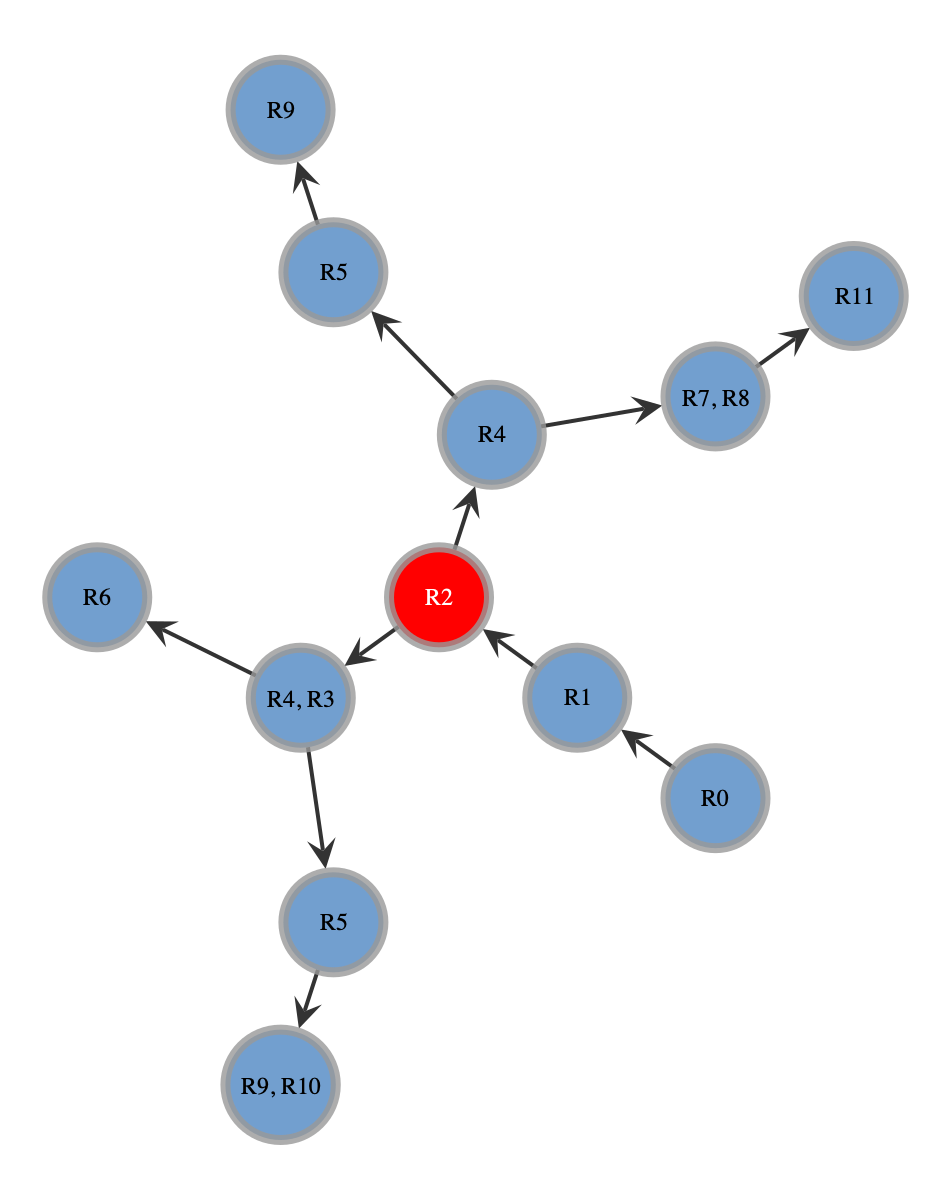

In [1887]:
# Example usage:
# Assuming g, measured_node, and nested_properties are defined
# draw_weight_propagation_graph(g, measured_node=nodes[2], nested_properties=reactions, layout='radial', vertex_size=40, edge_color="#333333")

draw_weight_propagation_graph(g, measured_node=nodes[2], nested_properties=reactions, 
                              layout='radial', vertex_size=50, edge_color="#333333",
                              vertex_font_size=12, edge_pen_width=2, edge_marker_size=15)

In [1888]:
False ^ True ^ False

True

Categories: ['R2', 'R3', 'R4', 'R5', 'R9', 'R10', 'R6', 'R7', 'R8', 'R11', 'R1', 'R0']
R2
R2
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:True
Overall evaluation:True
Adding weight of 1.0
Added weight under node: 2
R3
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R2
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight unde

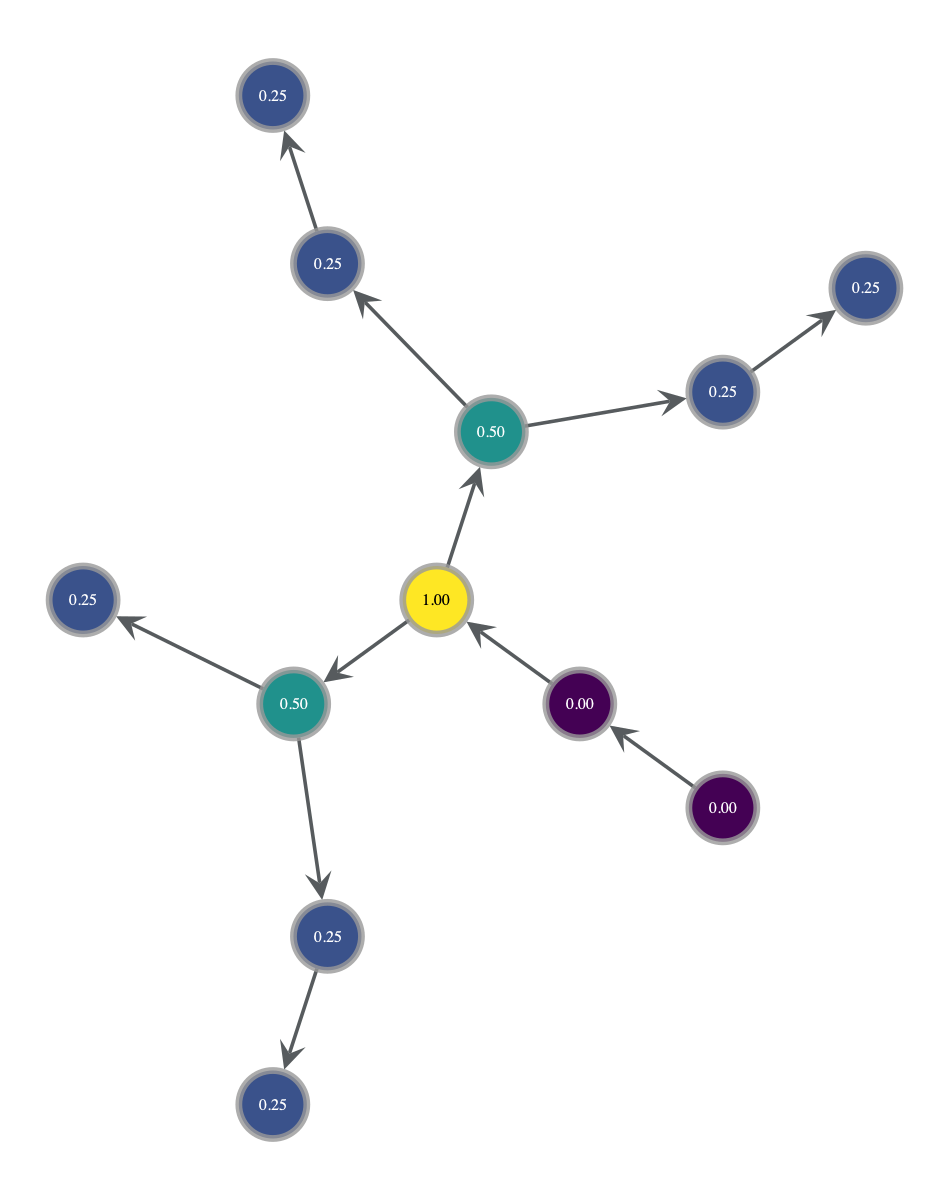

R2
R3
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R3
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R3
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding

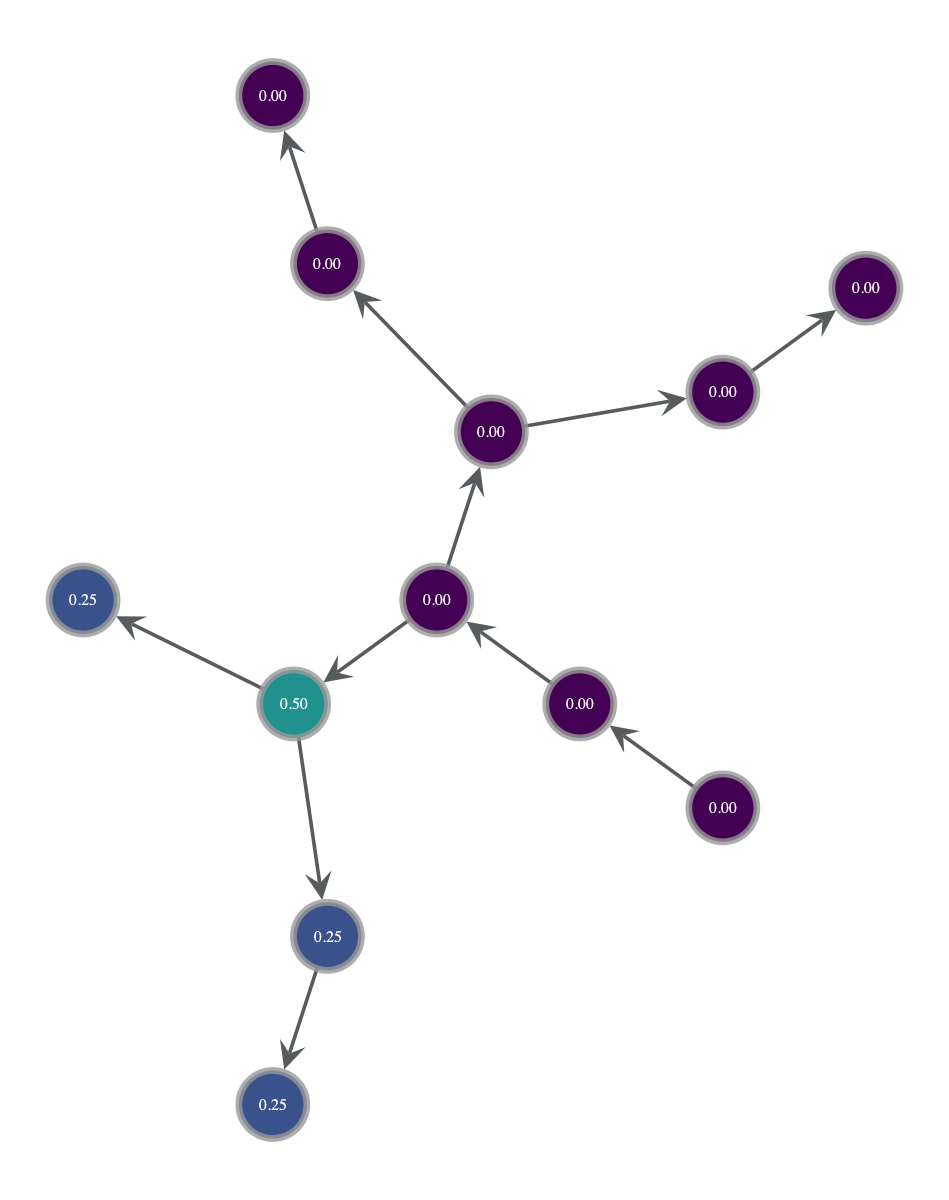

R2
R4
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R4
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R4
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:Fals

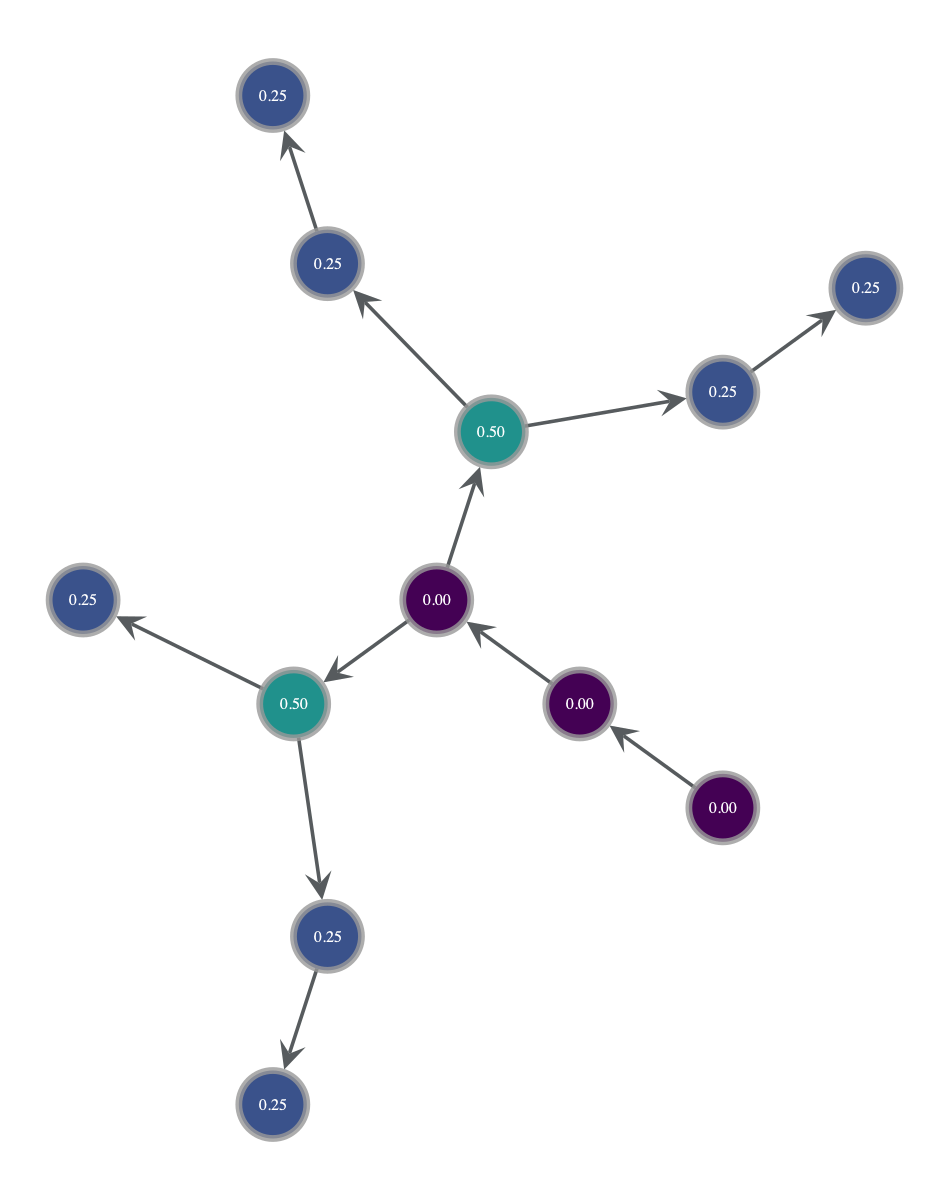

R2
R5
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R5
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R5
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not u

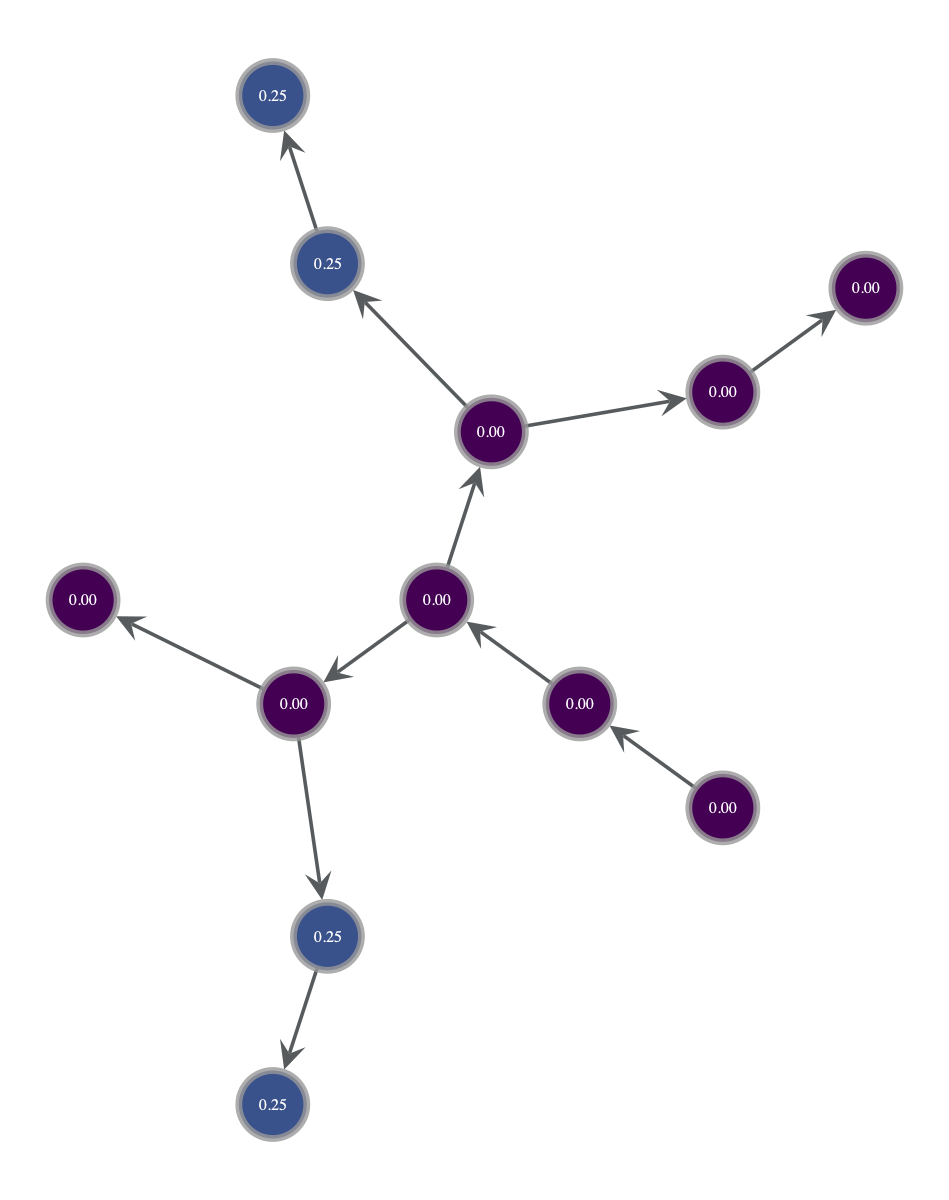

R2
R9
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R9
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R9
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node

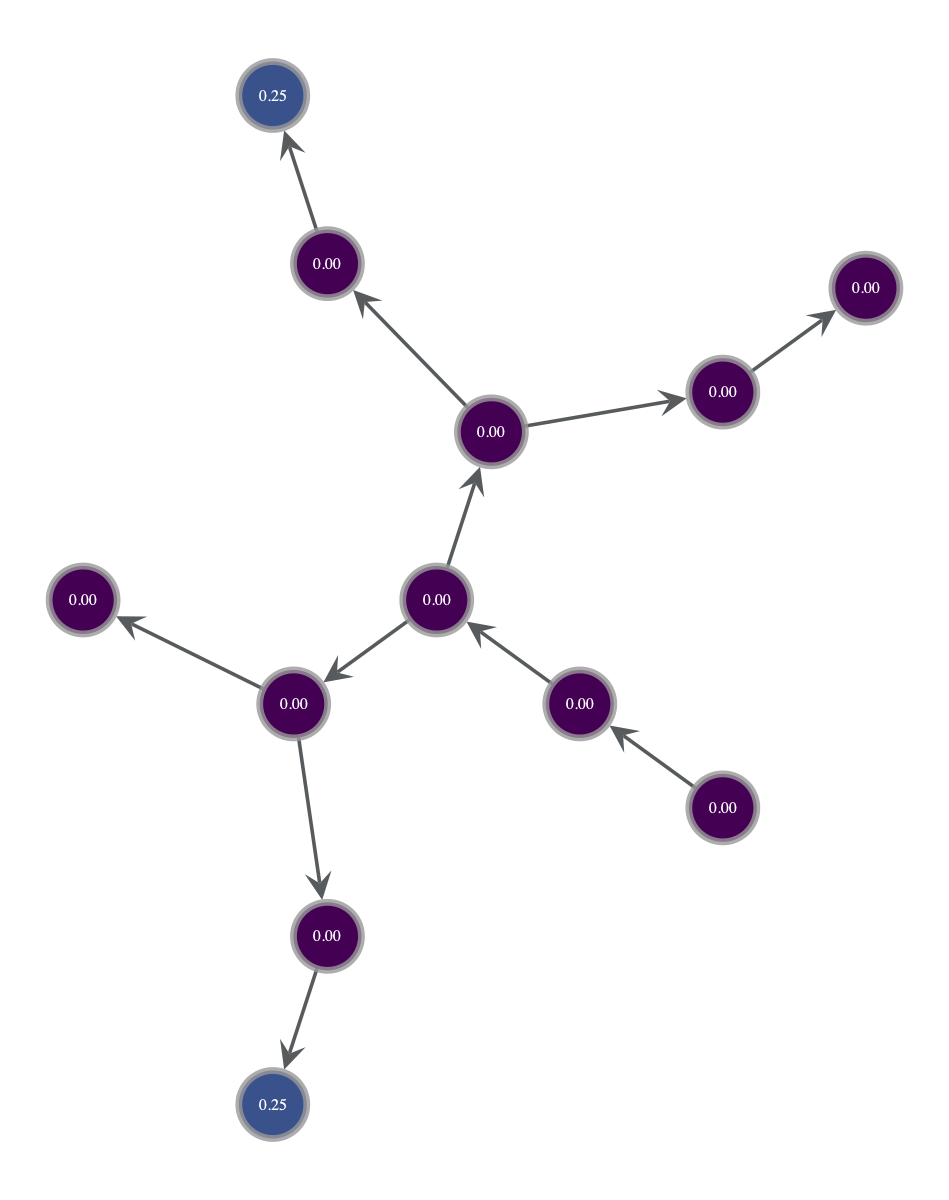

R2
R10
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R10
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R10
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
No

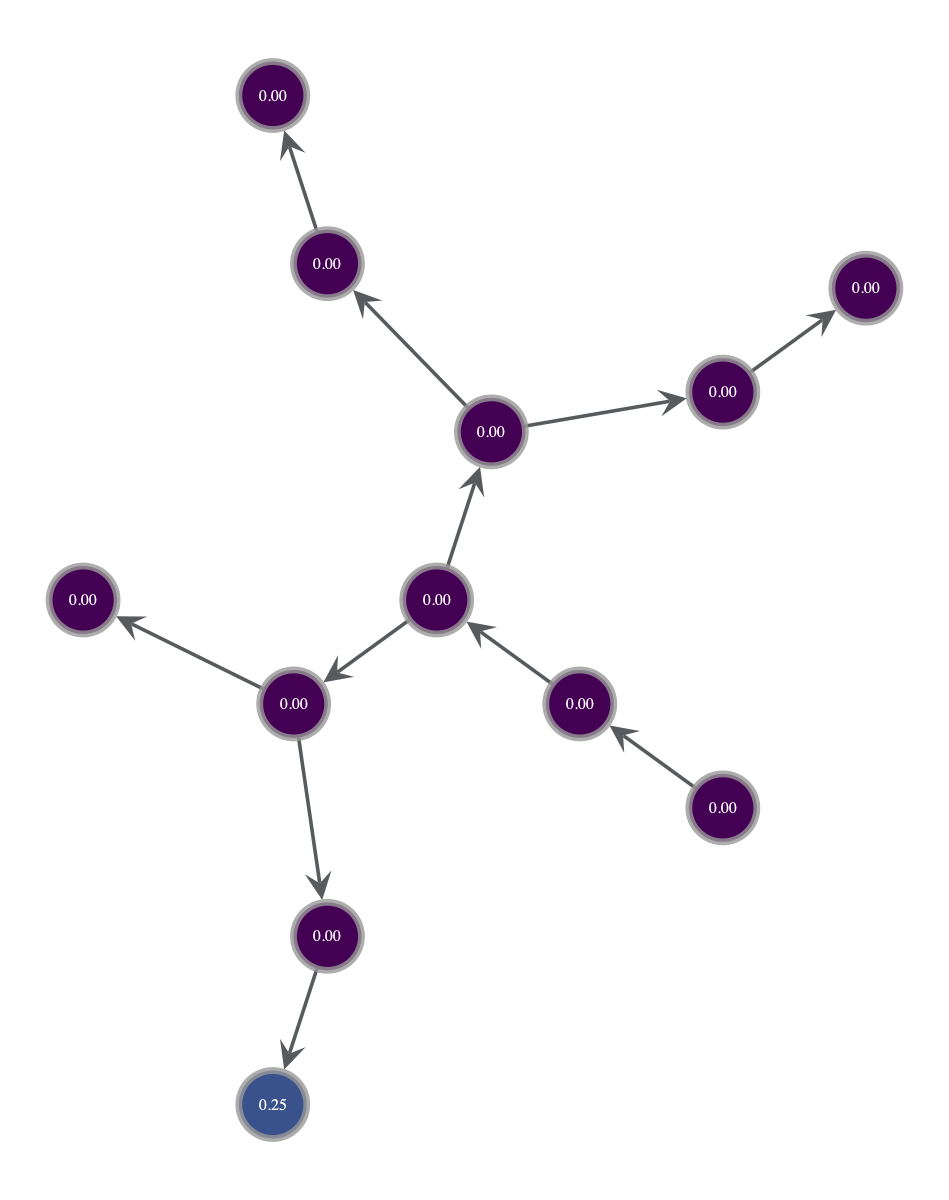

R2
R6
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R6
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R6
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node

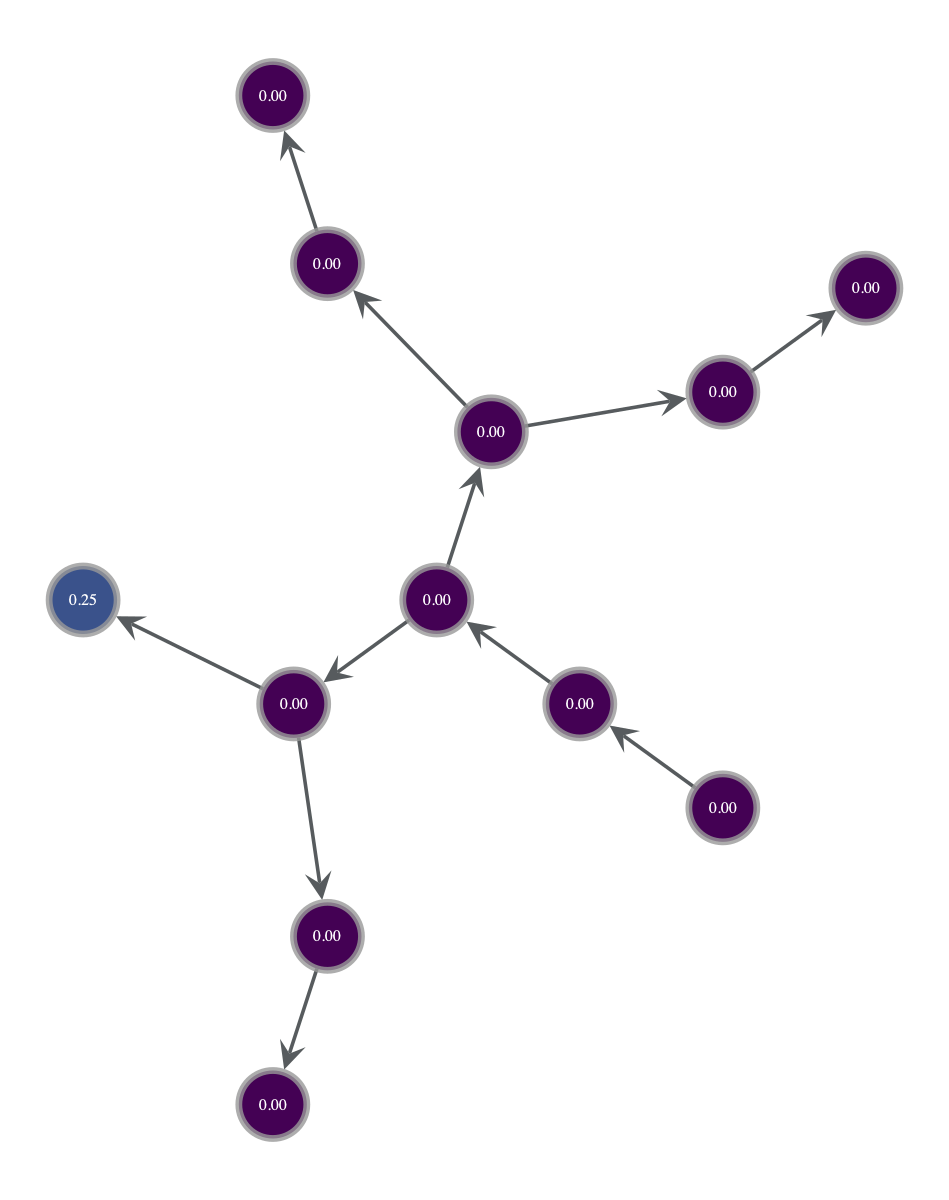

R2
R7
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R7
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R7
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

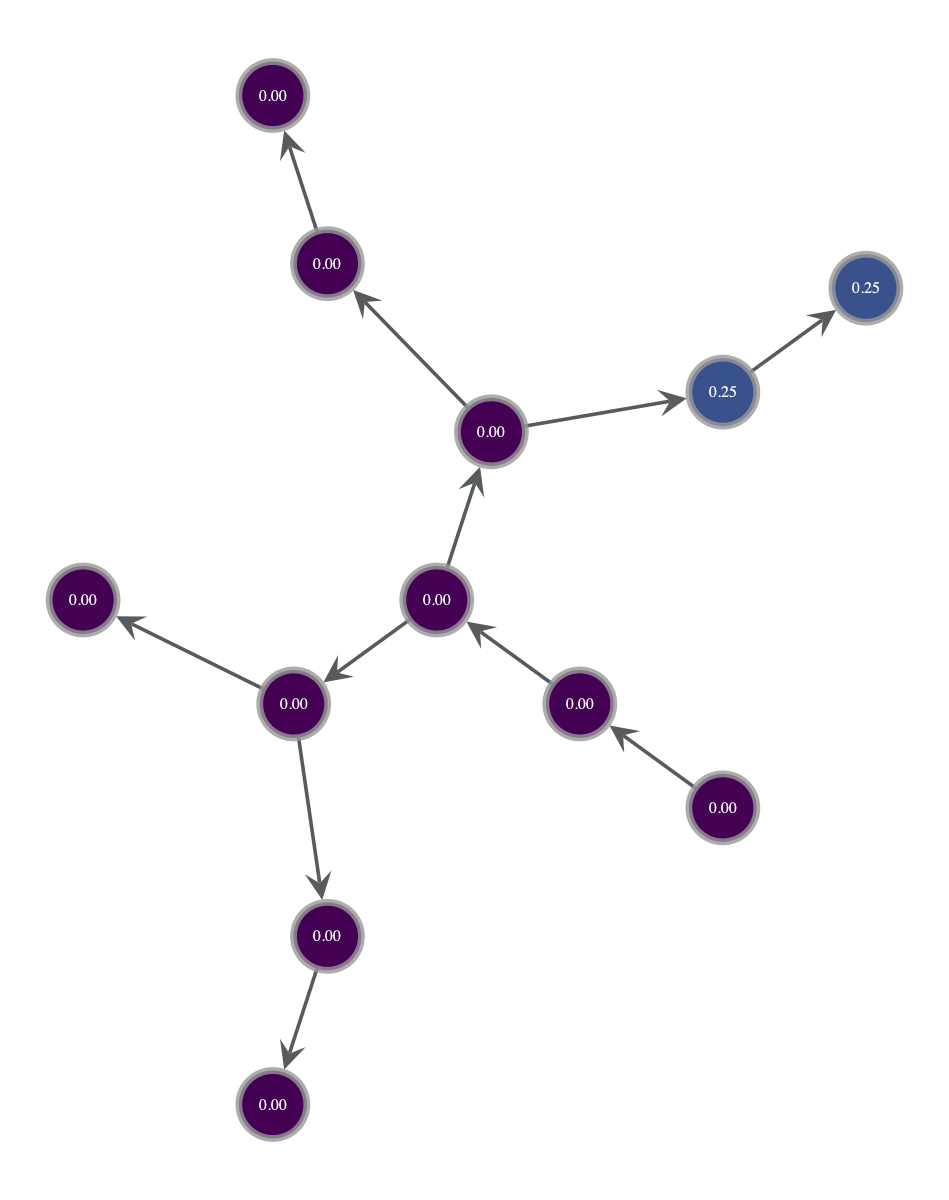

R2
R8
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R8
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R8
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

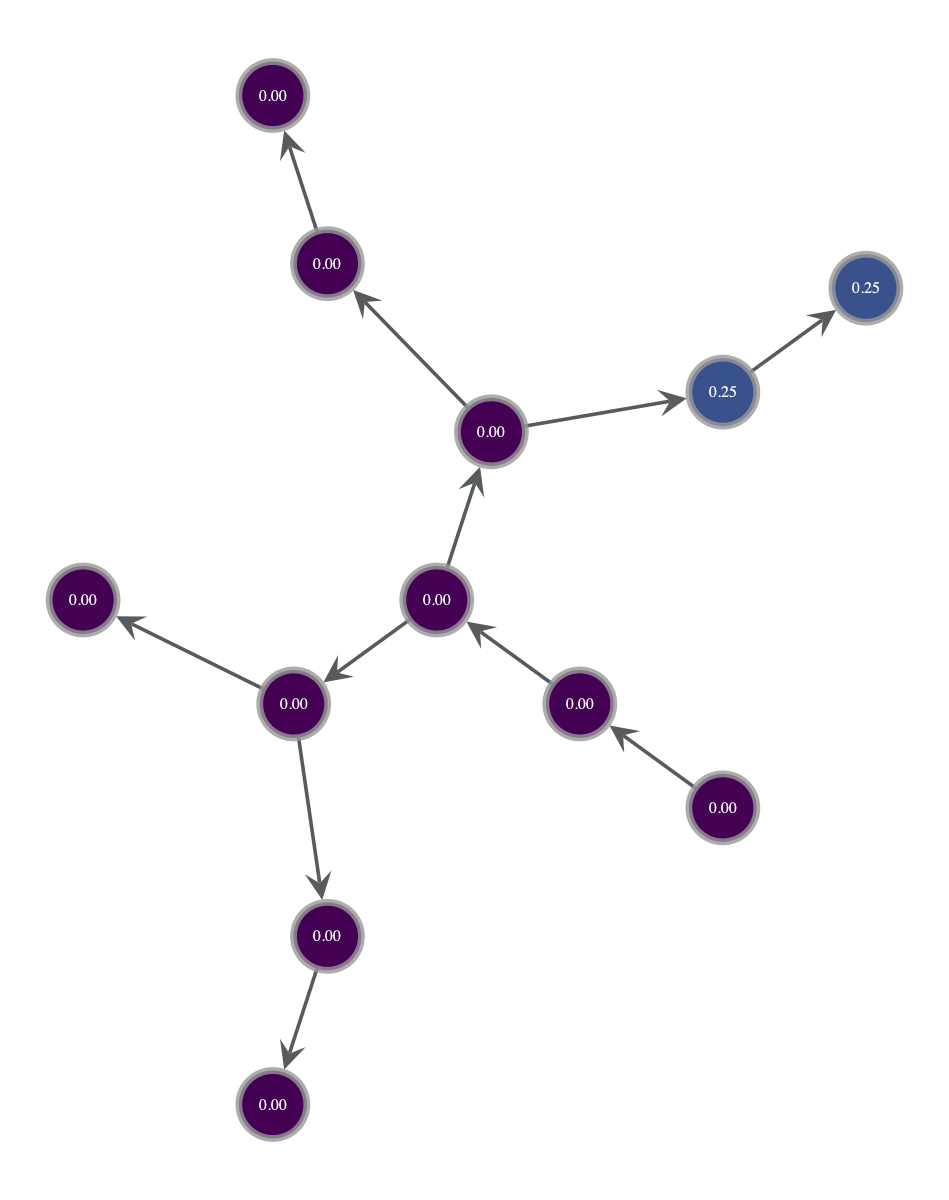

R2
R11
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R11
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R11
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for

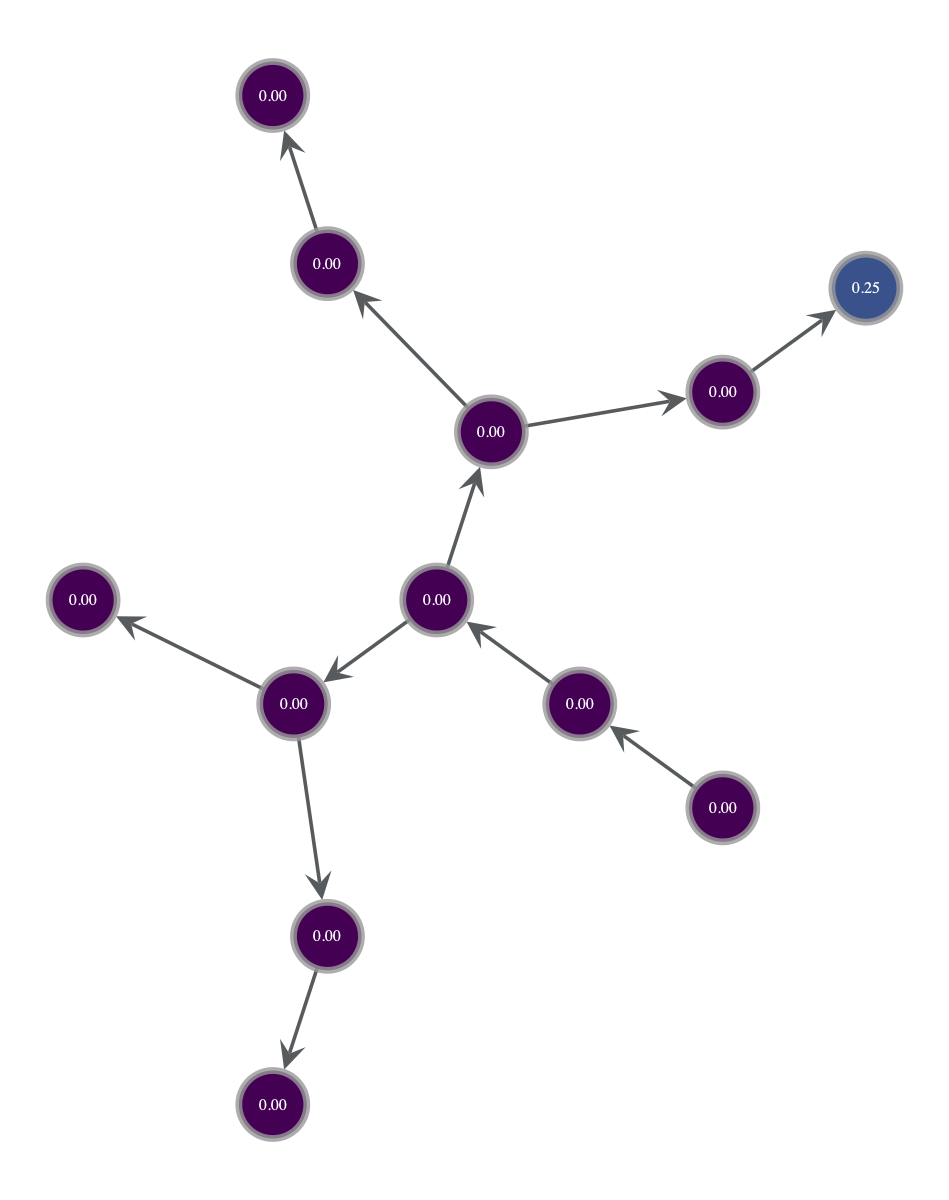

R2
R1
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R1
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R1
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

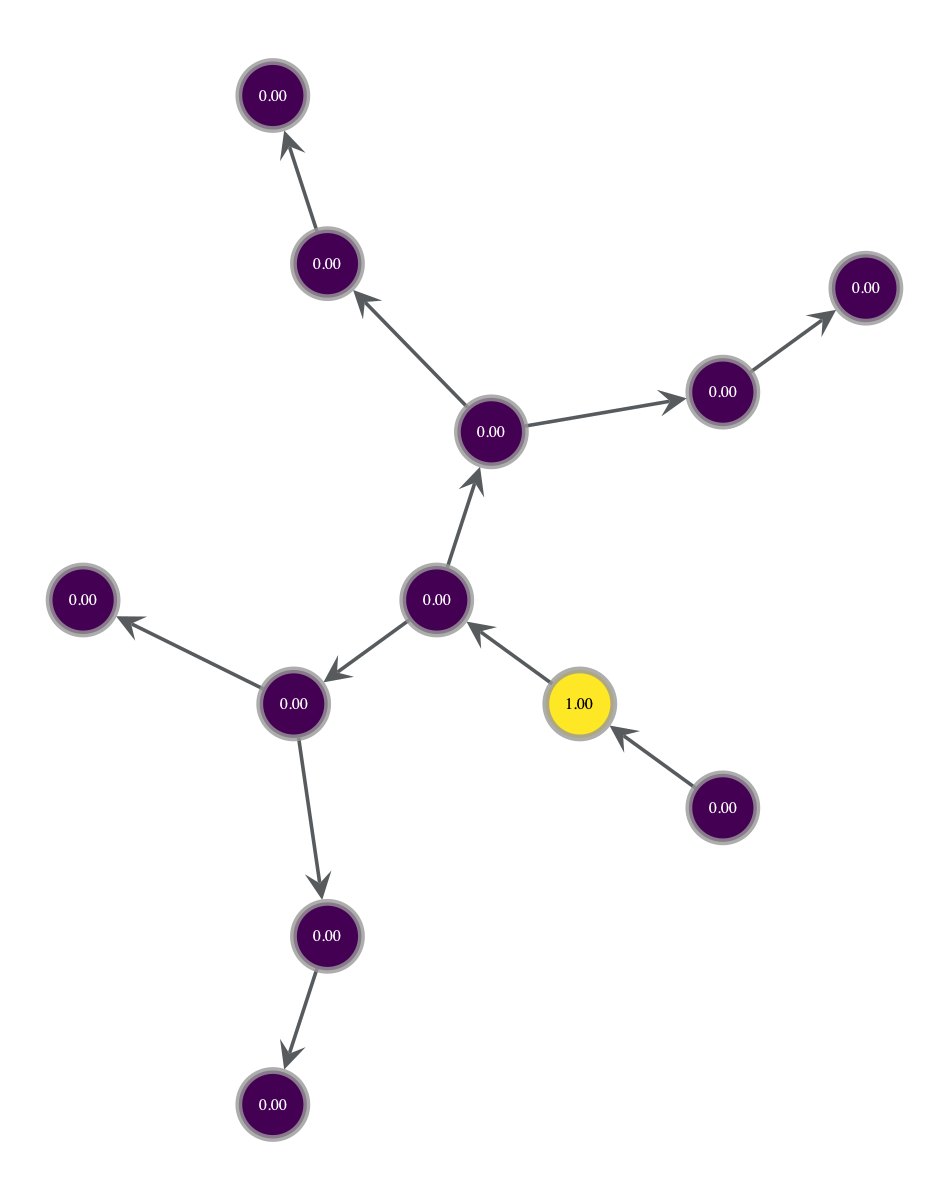

R2
R0
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R0
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R0
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

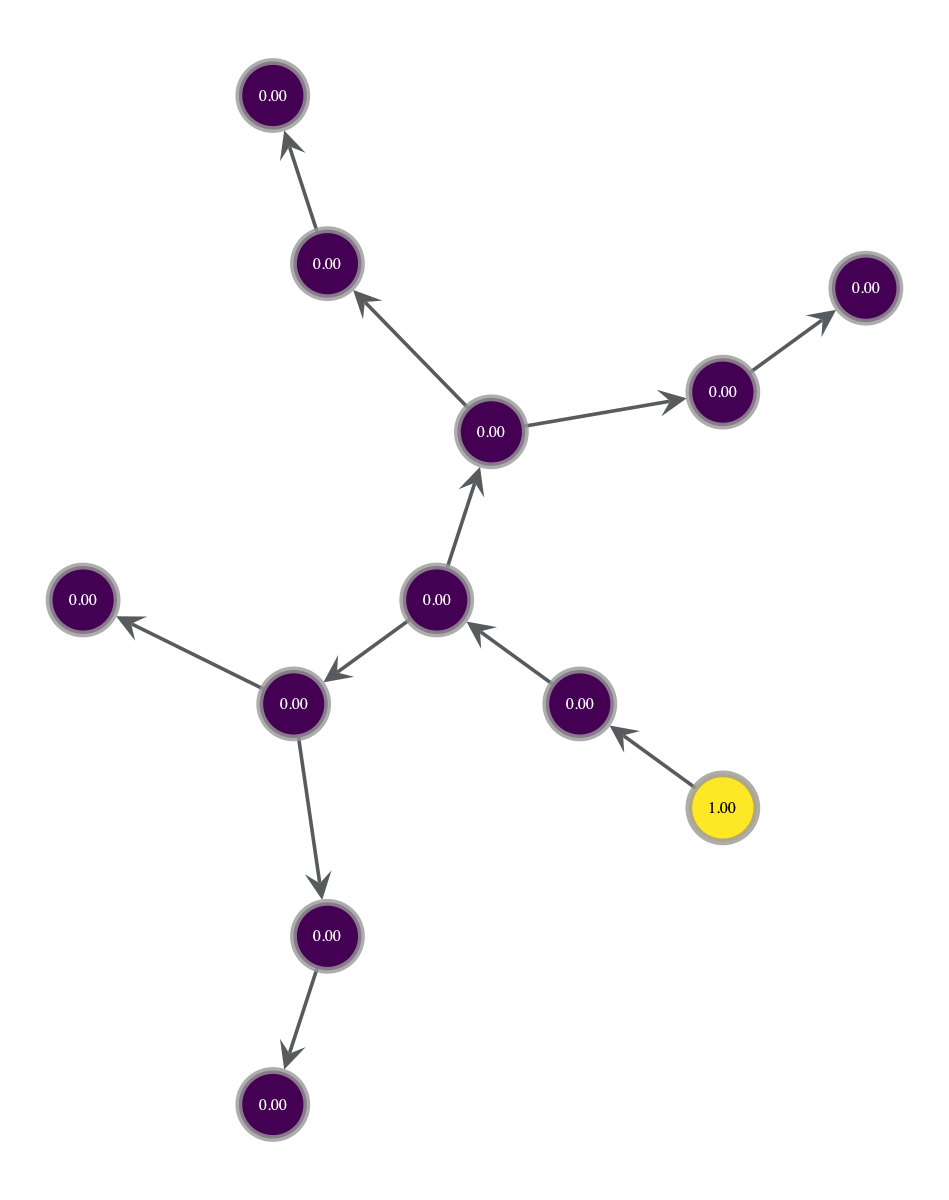

In [1889]:
# Example usage, assuming 'g', 'measured_node', and 'accumulated_categories' are already defined
test_plot = draw_category_propagation_subplots(
    g=g,
    measured_node=nodes[2],
    accumulated_categories=accumulated_categories,  # Pass the data here
    layout='radial',
    categories=None,  # Specify which categories to visualize, or None to include all
    output=None,  # Show inline
    edge_marker_size=14,
)

In [1890]:
# len(accumulated_categories['pathlog'])
# accumulated_categories['pathlog']

In [1891]:
[item for item in accumulated_categories['pathlog'] if 'R0' in item['current_category']]

[{'node': 0,
  'weight': 1.0,
  'current_origin': 'upstream',
  'inherited_categories': {'R2': 'measured_node', 'R1': 'upstream'},
  'current_category': 'R0'}]

In [1892]:
[item['node'] for item in accumulated_categories['pathlog'] if 'R1' in item['inherited_categories'] or 'R1' in item['current_category']]

[9, 11, 1, 0]

In [1893]:
accumulated_categories['pathlog']

[{'node': 2,
  'weight': 1.0,
  'current_origin': 'start',
  'inherited_categories': {},
  'current_category': 'R2'},
 {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R3'},
 {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R4'},
 {'node': 5,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream'},
  'current_category': 'R5'},
 {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'current_category': 'R9'},
 {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'c

In [1894]:
[item for item in accumulated_categories['pathlog'] if item['current_origin']=='upstream']

[{'node': 1,
  'weight': 1.0,
  'current_origin': 'upstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R1'},
 {'node': 0,
  'weight': 1.0,
  'current_origin': 'upstream',
  'inherited_categories': {'R2': 'measured_node', 'R1': 'upstream'},
  'current_category': 'R0'}]

In [1895]:
extract_category_weights(accumulated_categories)

You need to specify the category of interest.


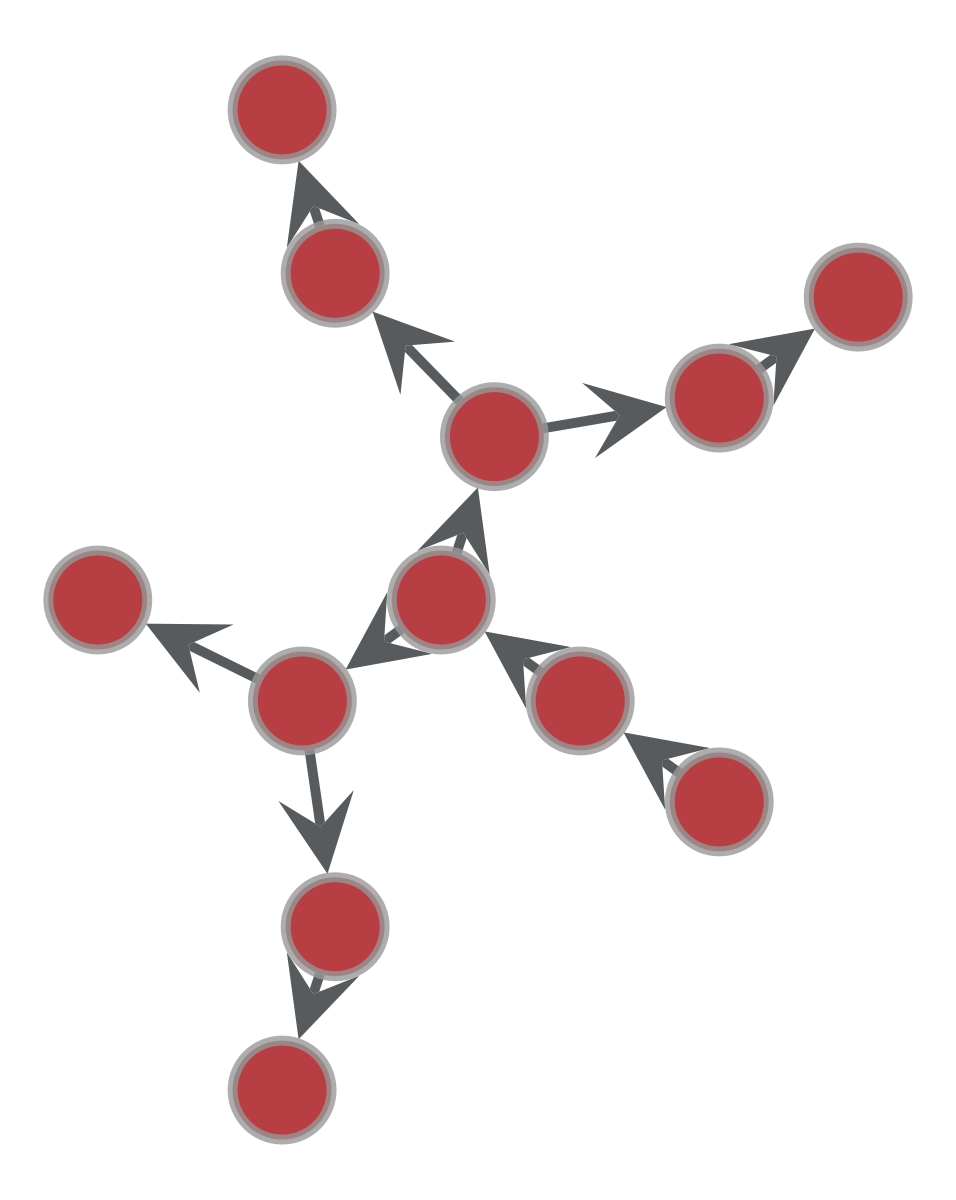

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d25dcd0>

In [1896]:
graph_draw(g, pos=radial_tree_layout(g, nodes[2]))

In [1897]:
extract_category_weights(accumulated_categories)

You need to specify the category of interest.


In [1898]:
accumulated_categories['pathlog']

[{'node': 2,
  'weight': 1.0,
  'current_origin': 'start',
  'inherited_categories': {},
  'current_category': 'R2'},
 {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R3'},
 {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R4'},
 {'node': 5,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream'},
  'current_category': 'R5'},
 {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'current_category': 'R9'},
 {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'c

In [1899]:
cat_of_interest = 'R2'
cat_of_interest_nodeweights = {
    item['node']: item['weight'] if (cat_of_interest in str(item['inherited_categories']) or (cat_of_interest in str(item['current_category']))) else 0.0 
    for item in accumulated_categories['pathlog']
}
cat_of_interest_nodeweights

{2: 1.0,
 3: 0.5,
 5: 0.25,
 9: 0.25,
 6: 0.25,
 4: 0.5,
 7: 0.25,
 10: 0.25,
 8: 0.25,
 11: 0.25,
 1: 1.0,
 0: 1.0}

In [1900]:
{
    item['node']: item if ((cat_of_interest in str(item['inherited_categories']) and str(item['current_origin'])=='downstream') or (cat_of_interest in str(item['current_category']))) else 0.0 
    for item in accumulated_categories['pathlog']
}

{2: {'node': 2,
  'weight': 1.0,
  'current_origin': 'start',
  'inherited_categories': {},
  'current_category': 'R2'},
 3: {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R4'},
 5: {'node': 5,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream'},
  'current_category': 'R5'},
 9: {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'current_category': 'R10'},
 6: {'node': 6,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream'},
  'current_category': 'R6'},
 4: {'node': 4,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'curre

In [1901]:
# for v in g.vertices():
#     node_index = int(v)
#     weight = extract_category_weights(accumulated_categories).get(node_index, 0)
#     print(f"Node {node_index}: Weight {weight}")

In [1902]:
[item for item in accumulated_categories['pathlog']]

[{'node': 2,
  'weight': 1.0,
  'current_origin': 'start',
  'inherited_categories': {},
  'current_category': 'R2'},
 {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R3'},
 {'node': 3,
  'weight': 0.5,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node'},
  'current_category': 'R4'},
 {'node': 5,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream'},
  'current_category': 'R5'},
 {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'current_category': 'R9'},
 {'node': 9,
  'weight': 0.25,
  'current_origin': 'downstream',
  'inherited_categories': {'R2': 'measured_node',
   'R3': 'downstream',
   'R4': 'downstream',
   'R5': 'downstream'},
  'c

In [1903]:
import matplotlib.cm as cm

cmap = cm.get_cmap('viridis')

/var/folders/w9/clr0qwgd40q24yylbl7pzsfh0000gn/T/ipykernel_22670/1154226762.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


In [1904]:
cmap(0)

(np.float64(0.267004),
 np.float64(0.004874),
 np.float64(0.329415),
 np.float64(1.0))

In [1905]:
# [[item==cat_of_interest for item in ['current_category']] for item in item in accumulated_categories['pathlog']]

In [1906]:
cat_of_interest = 'R1'

{ # logic needed changing to avoid including upsttream inheritances
                item['node']: item['weight'] if (any([item==cat_of_interest for item in item['inherited_categories'].keys()]) and str(item['current_origin'])!='upstream') or (any([item==cat_of_interest for item in item['current_category']])) else 0.0 
                for item in accumulated_categories['pathlog']
            }

{2: 0.0,
 3: 0.0,
 5: 0.0,
 9: 0.0,
 6: 0.0,
 4: 0.0,
 7: 0.0,
 10: 0.0,
 8: 0.0,
 11: 0.0,
 1: 0.0,
 0: 0.0}

Categories: ['R1', 'R2', 'R4']
R2
R1
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R1
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R1
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream

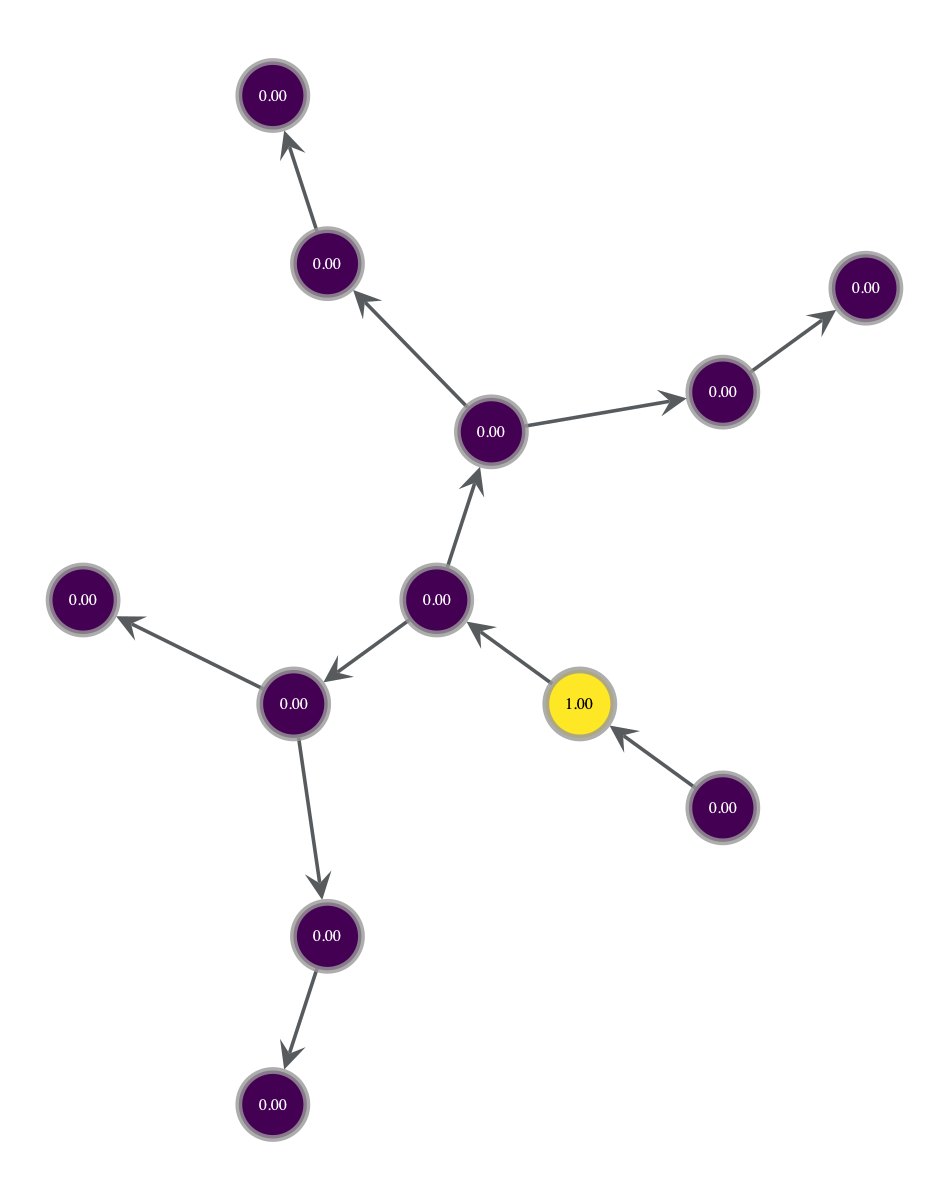

R2
R2
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:True
Overall evaluation:True
Adding weight of 1.0
Added weight under node: 2
R3
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R2
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R2
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:Fa

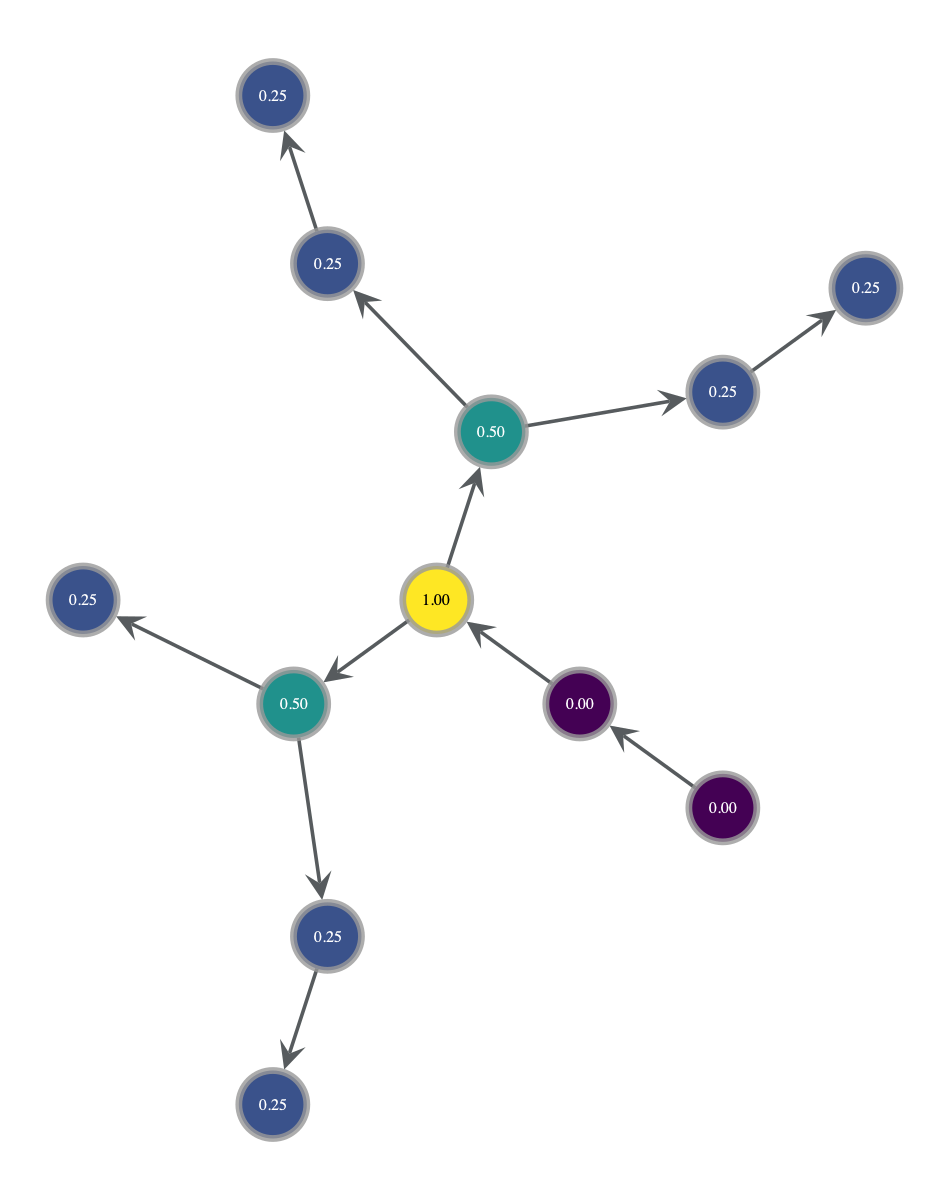

R2
R4
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R4
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R4
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:Fals

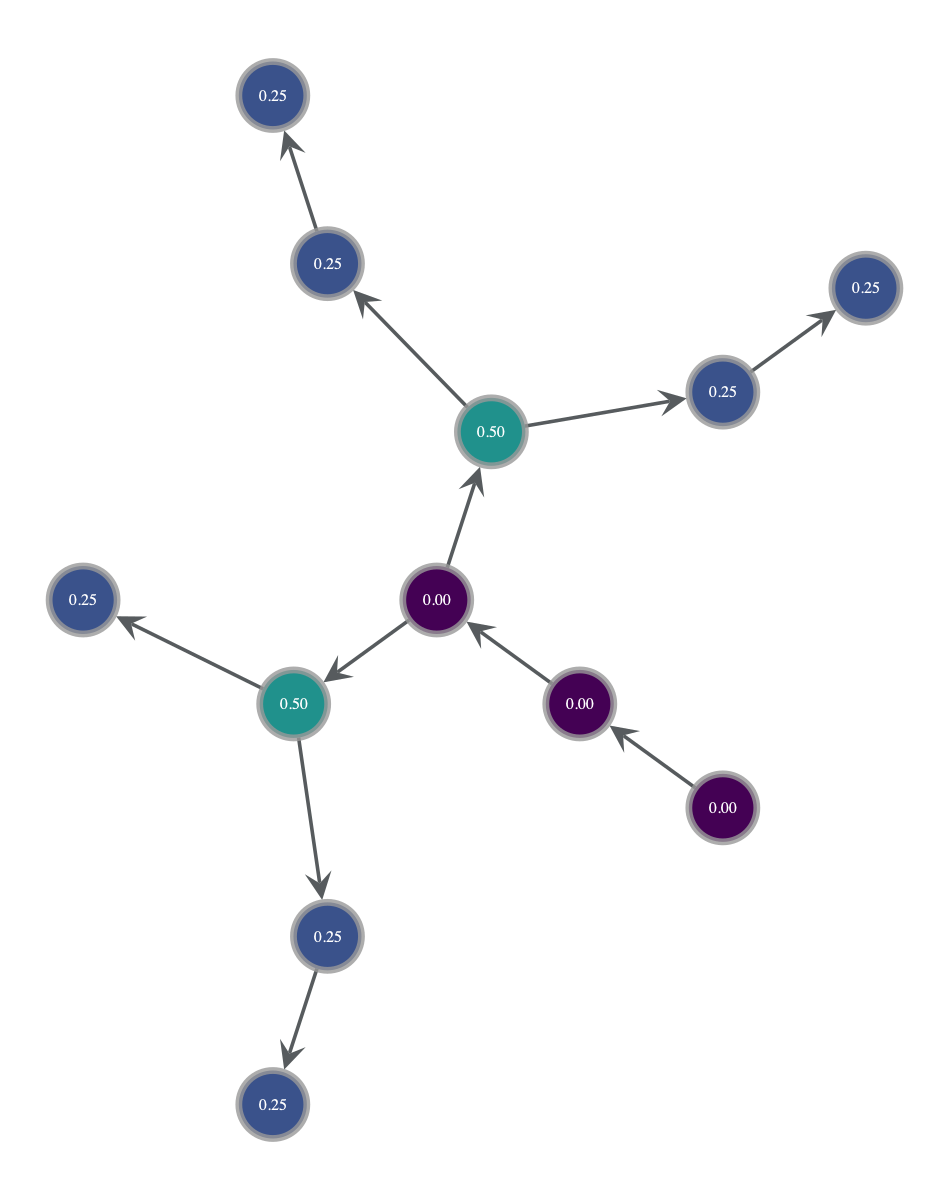

In [1907]:
# Example usage, assuming 'g', 'measured_node', and 'accumulated_categories' are already defined
test_plot = draw_category_propagation_subplots(
    g=g,
    measured_node=nodes[2],
    accumulated_categories=accumulated_categories,  # Pass the data here
    layout='radial',
    categories=['R1', 'R2', 'R4'],  # Specify which categories to visualize, or None to include all
    output=None,  # Show inline
    edge_marker_size=14,
)

Categories: ['R2', 'R3', 'R4', 'R5', 'R9', 'R10', 'R6', 'R7', 'R8', 'R11', 'R1', 'R0']
R2
R2
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:True
Overall evaluation:True
Adding weight of 1.0
Added weight under node: 2
R3
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R2
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight unde

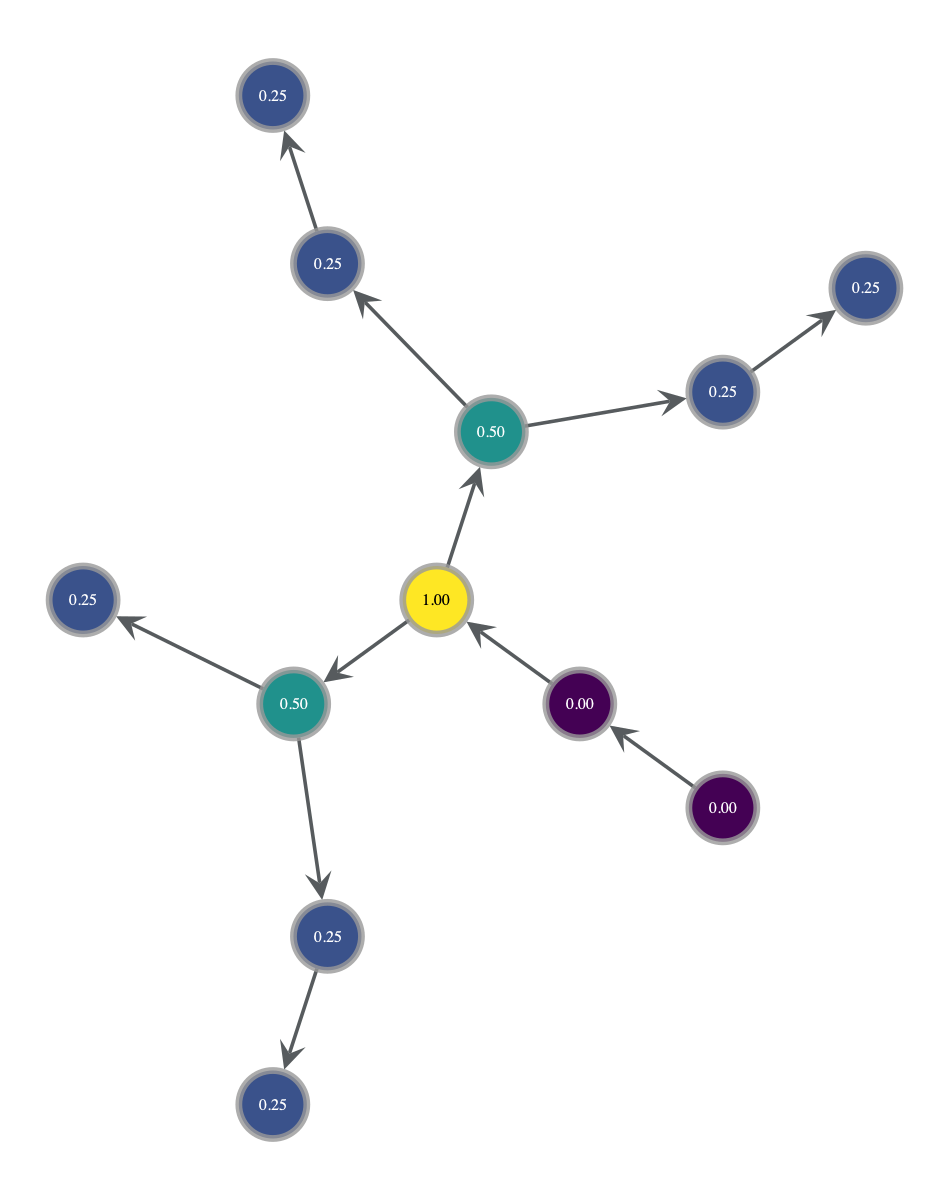

R2
R3
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R3
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R3
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding

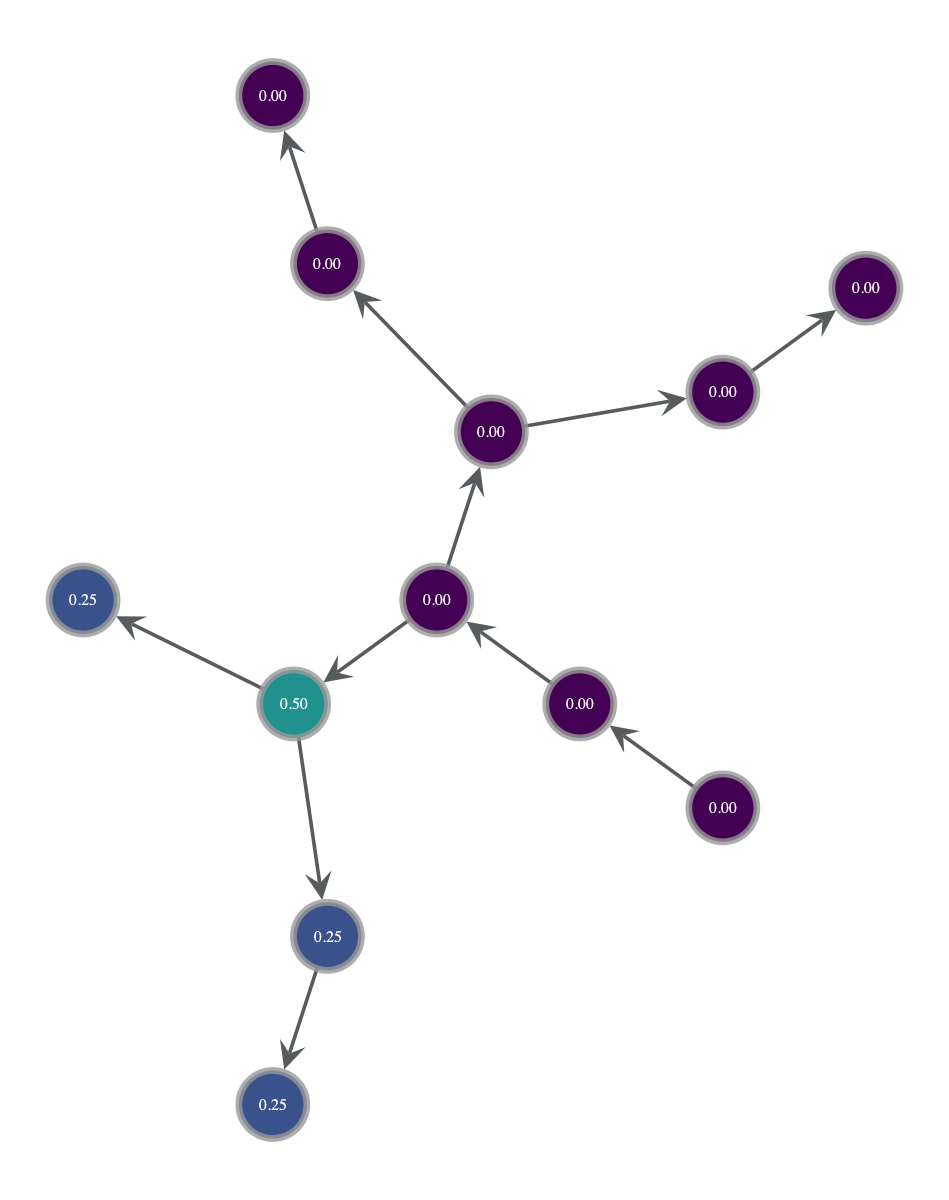

R2
R4
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R4
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R4
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:Fals

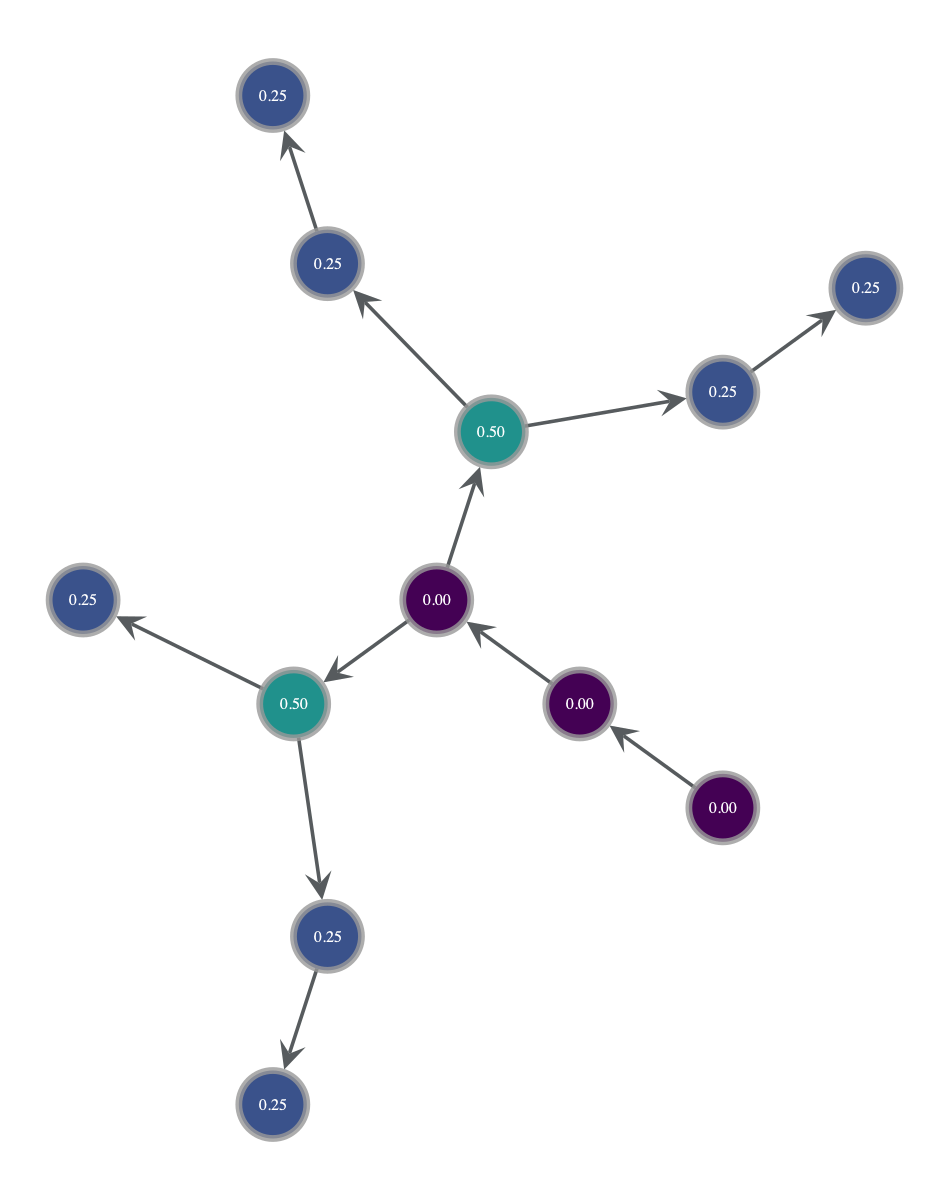

R2
R5
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R5
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R5
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not u

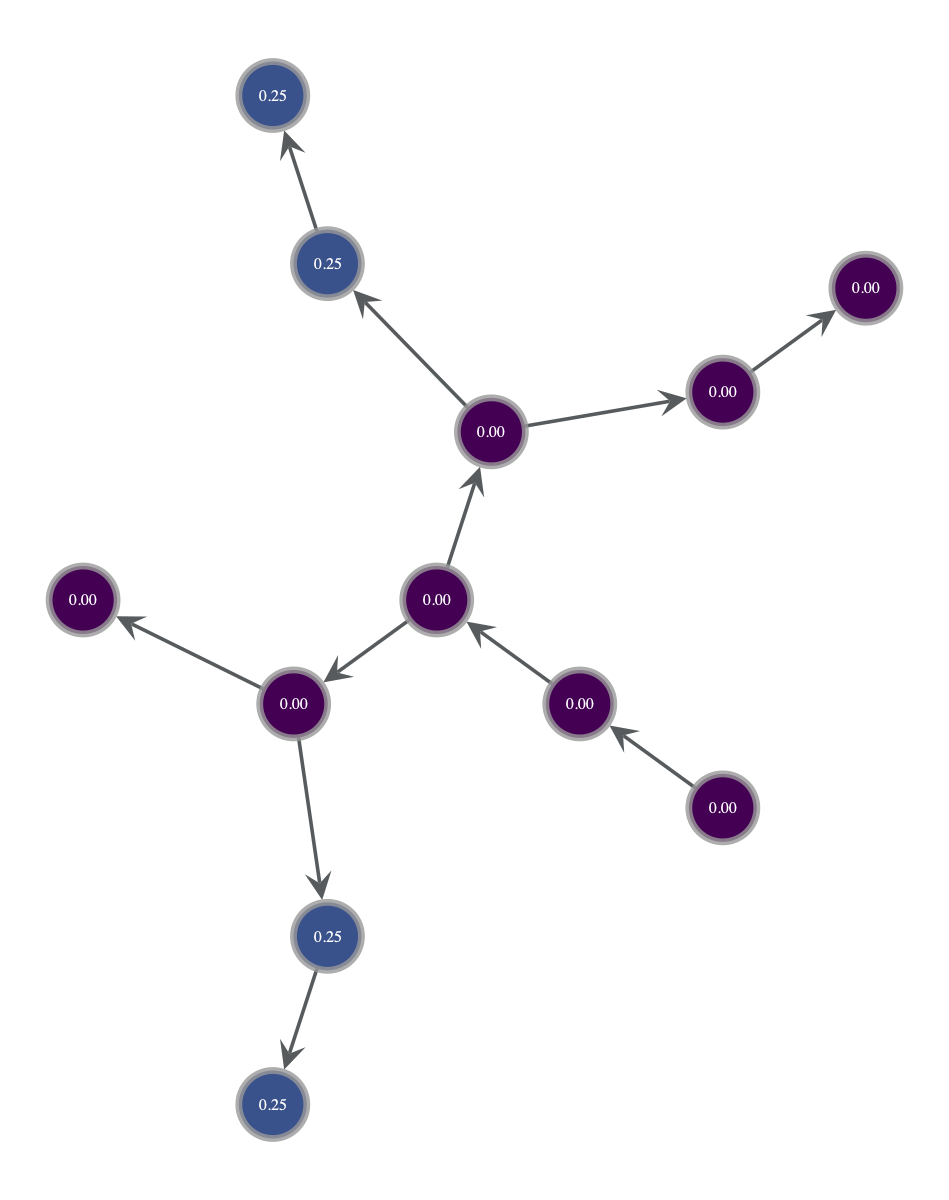

R2
R9
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R9
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R9
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node

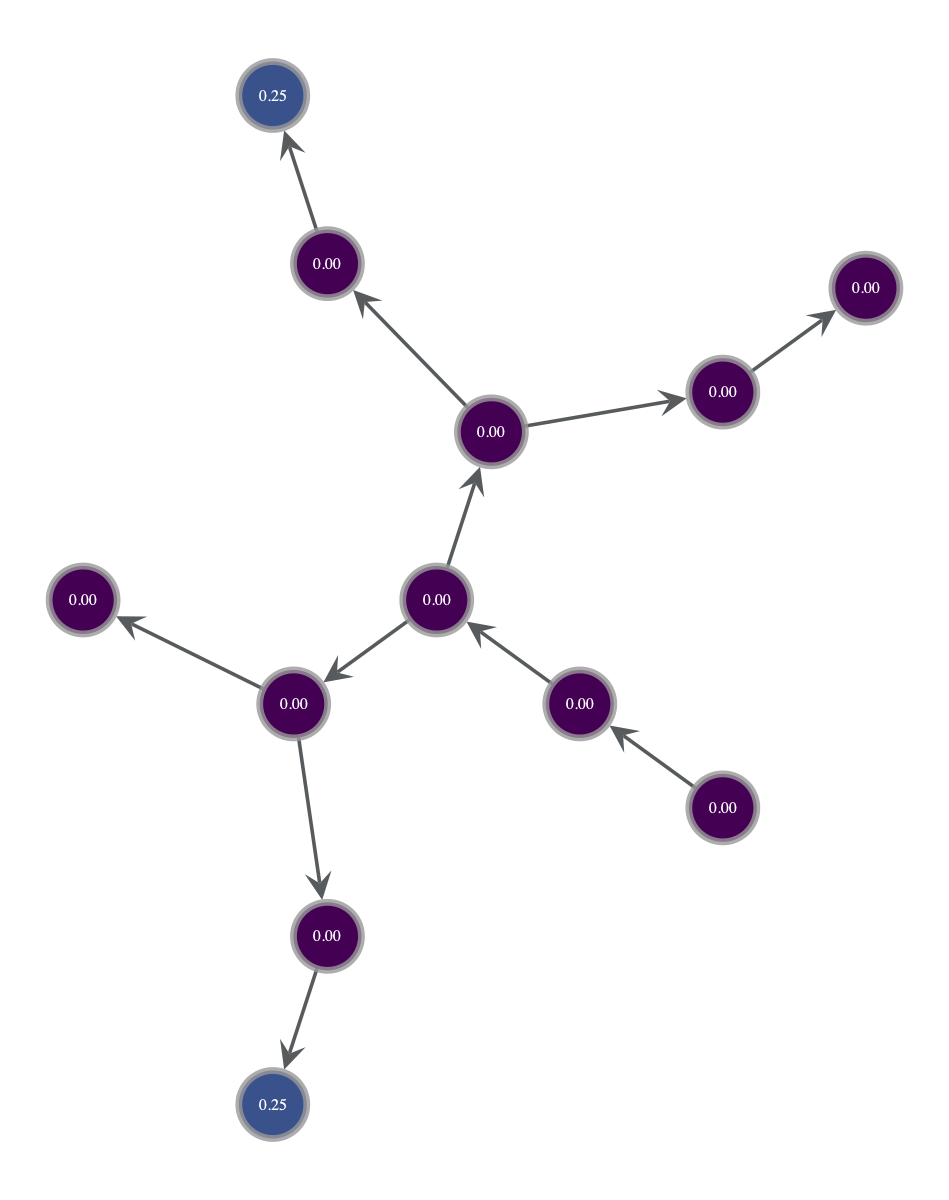

R2
R10
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R10
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R10
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
No

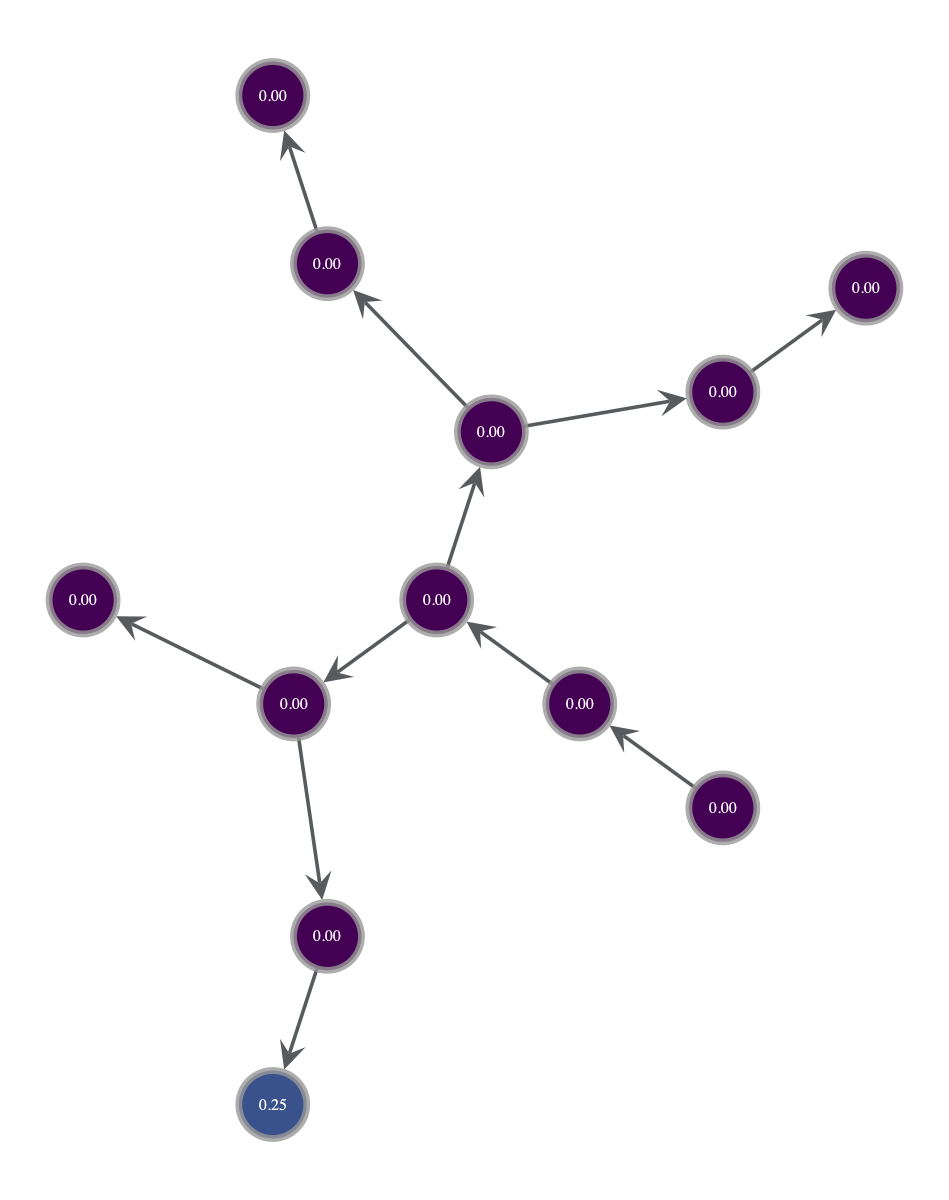

R2
R6
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R6
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R6
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node

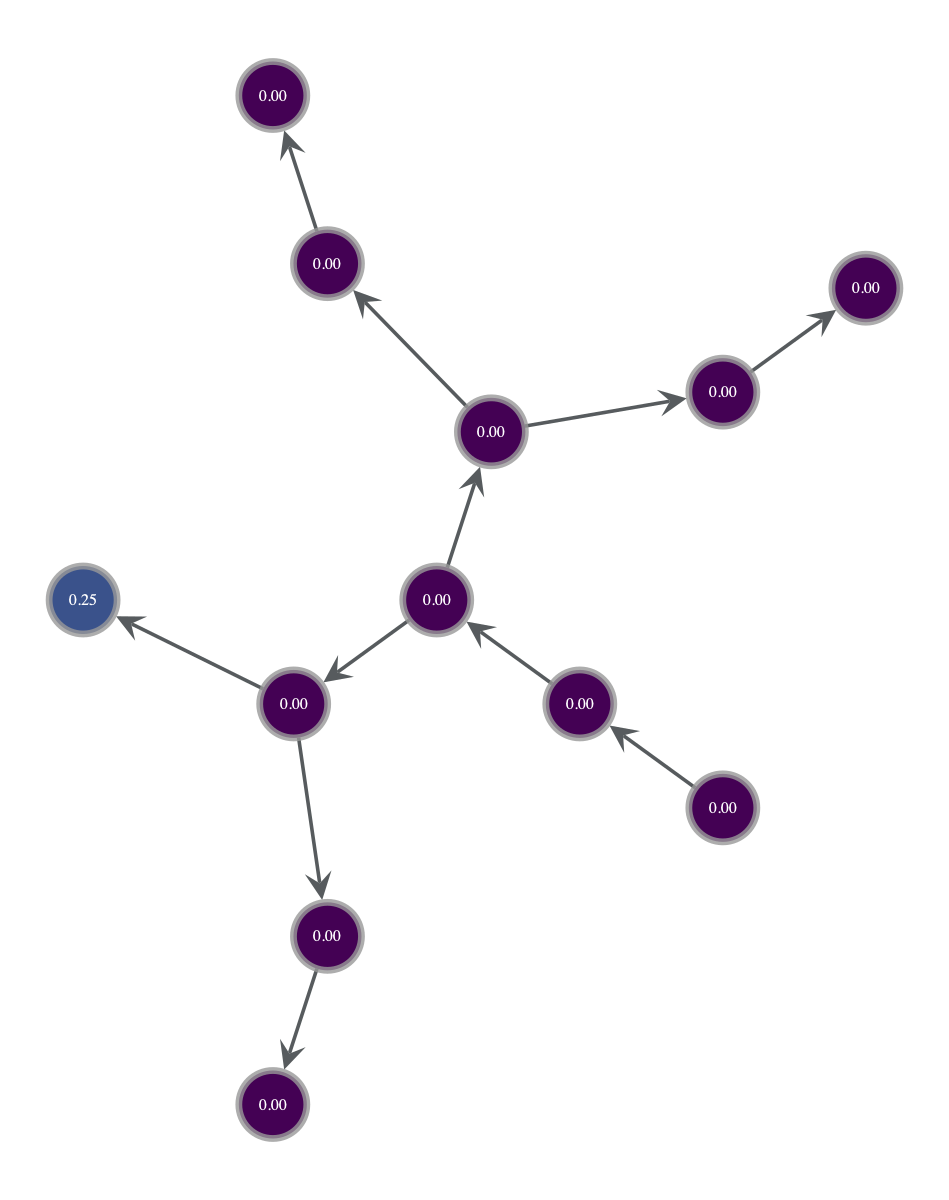

R2
R7
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R7
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R7
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

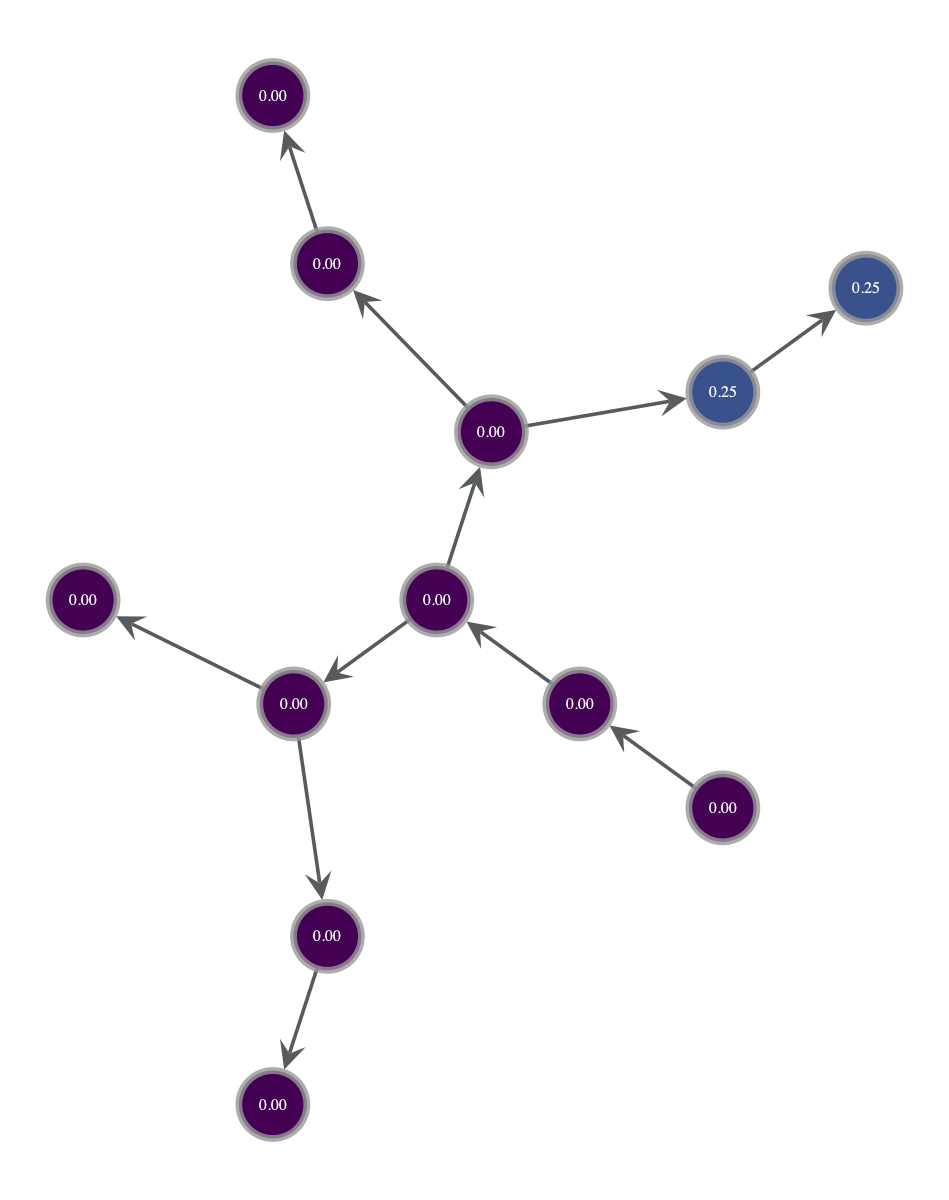

R2
R8
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R8
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R8
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

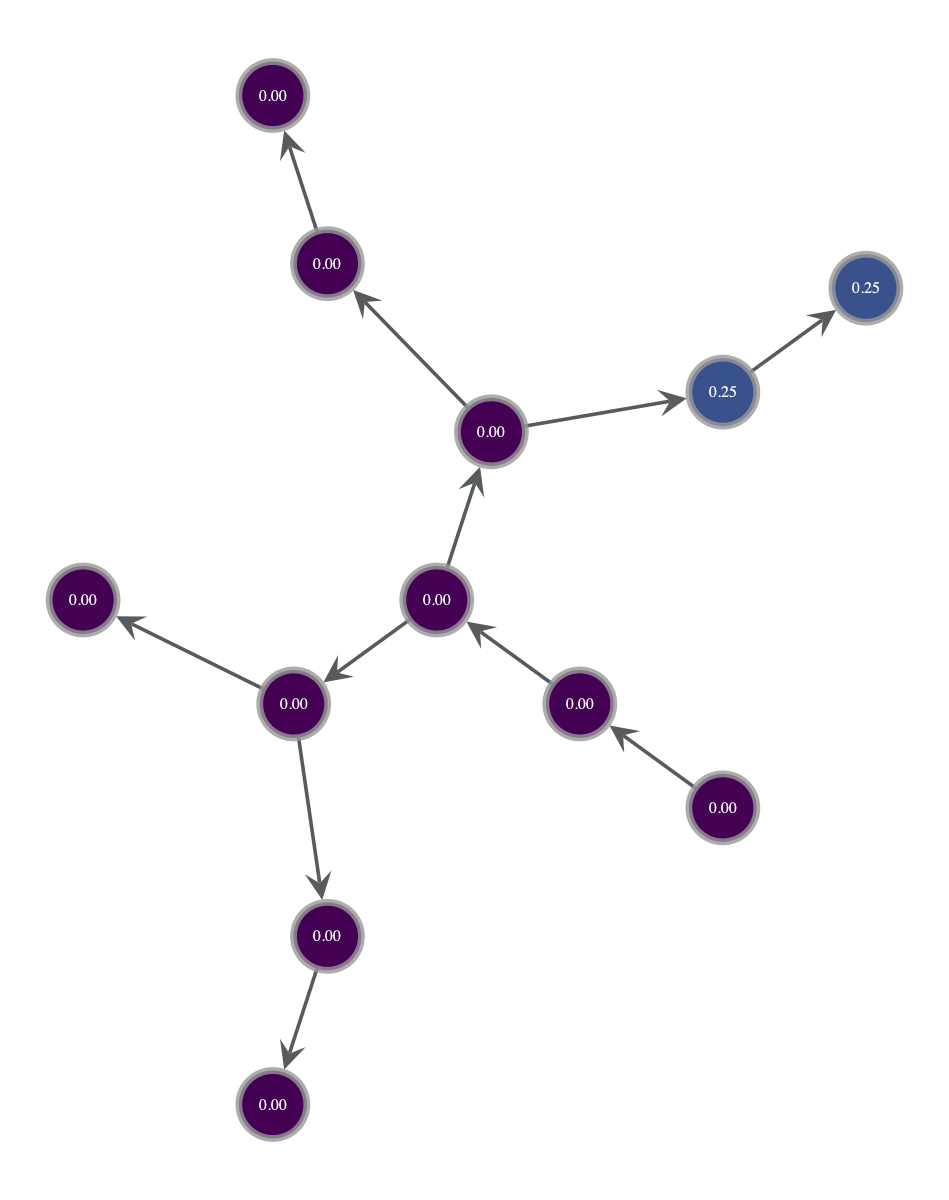

R2
R11
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R11
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R11
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for

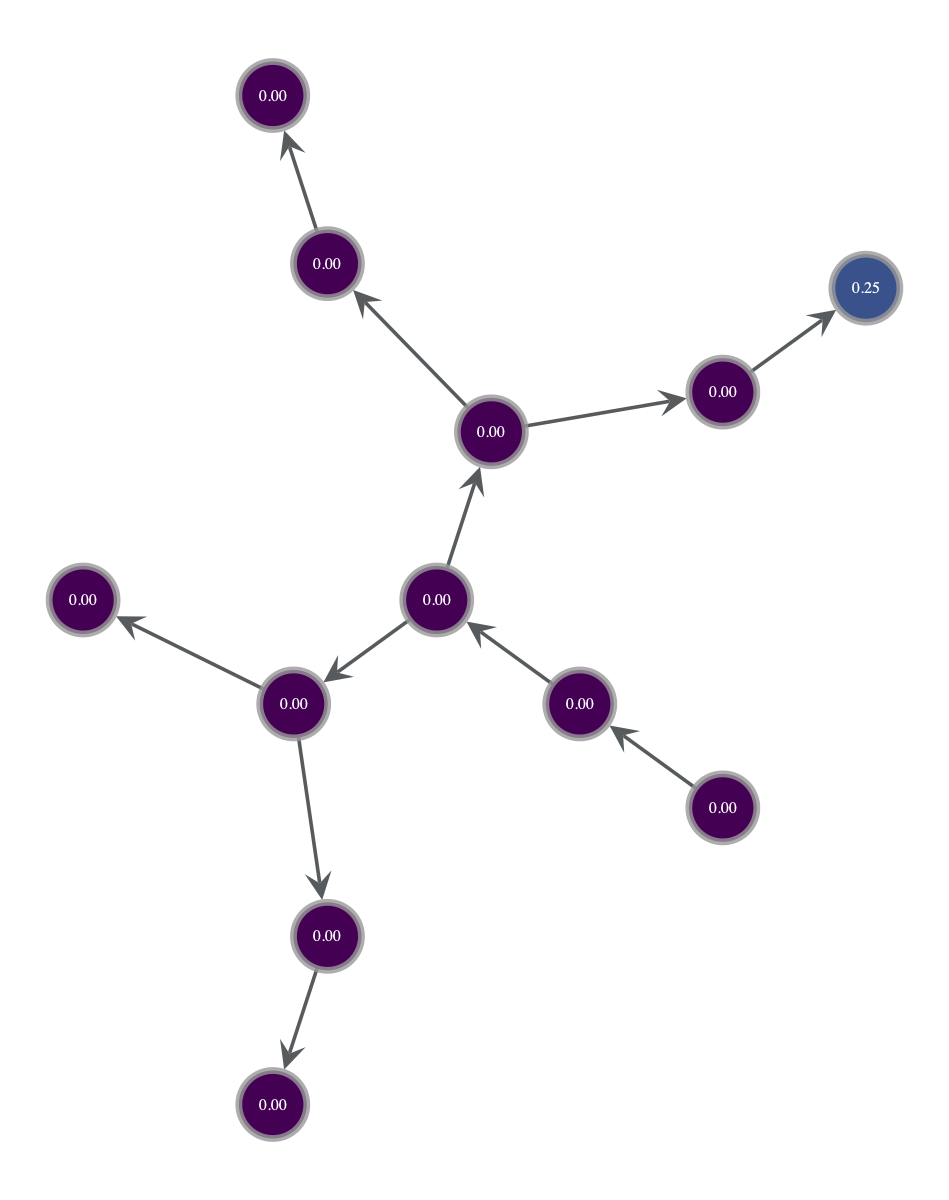

R2
R1
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R1
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R1
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

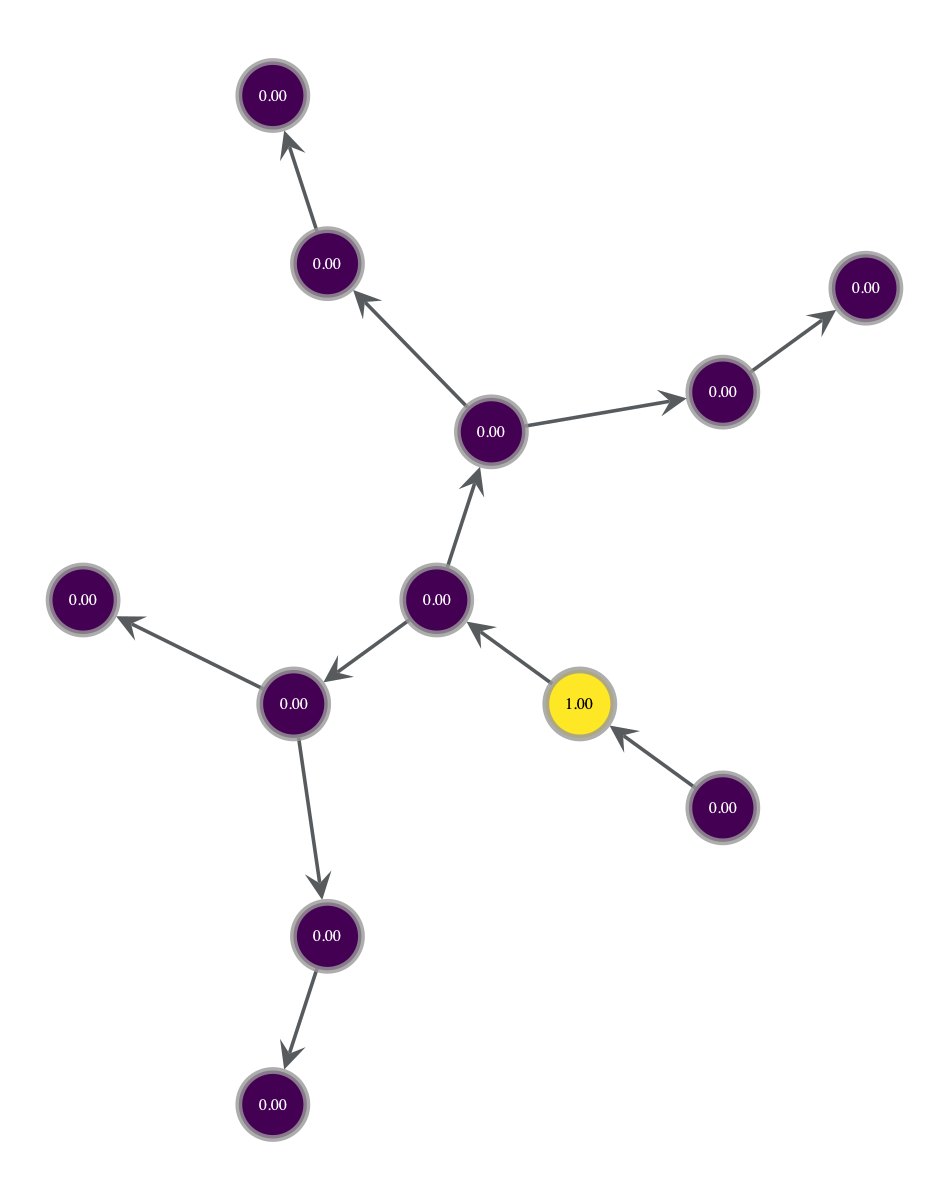

R2
R0
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R0
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R0
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

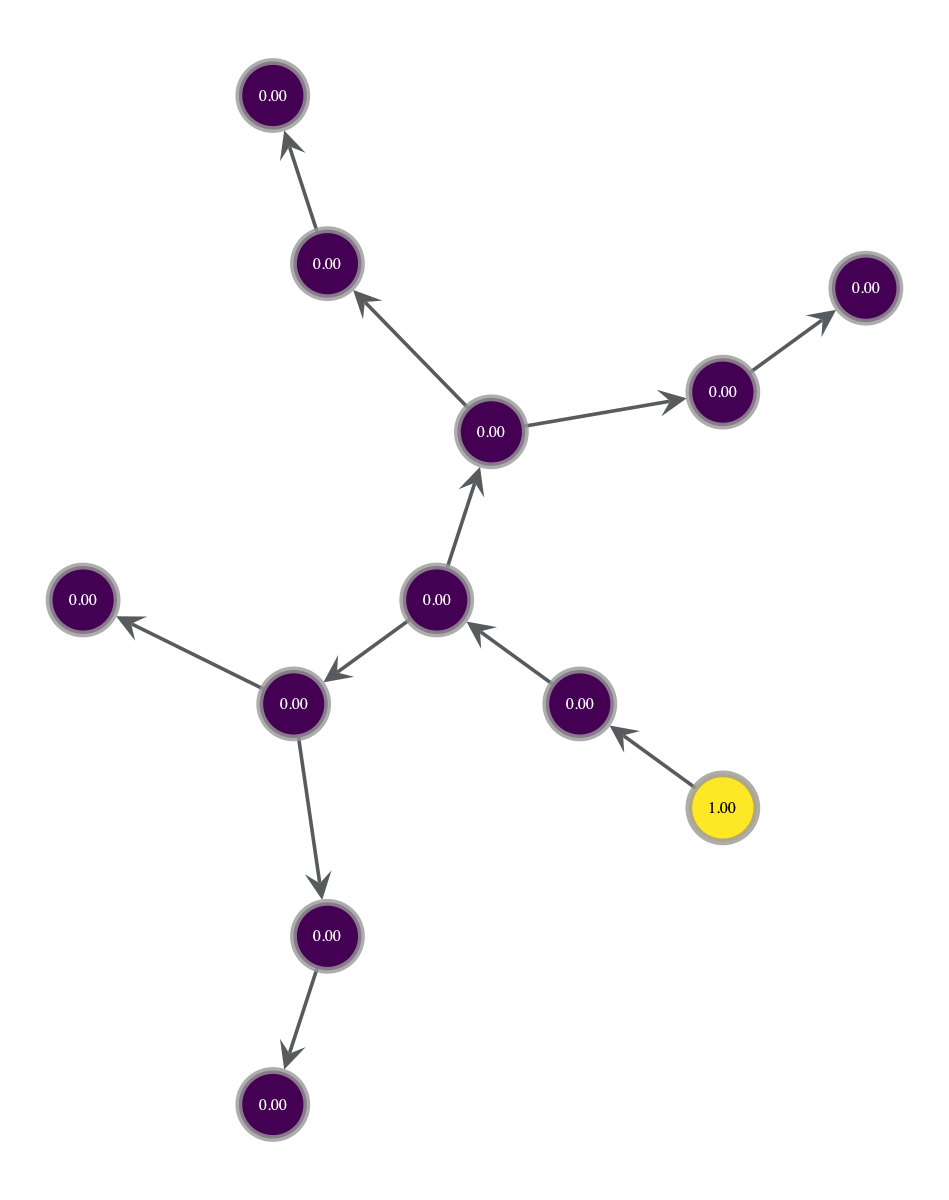

In [1908]:
# Example usage, assuming 'g', 'measured_node', and 'accumulated_categories' are already defined
test_plot = draw_category_propagation_subplots(
    g=g,
    measured_node=nodes[2],
    accumulated_categories=accumulated_categories,  # Pass the data here
    layout='radial',
    categories=None,  # Specify which categories to visualize, or None to include all
    output=None,  # Show inline
    edge_marker_size=14,
)

Categories: ['R2', 'R3', 'R4', 'R5', 'R9', 'R10', 'R6', 'R7', 'R8', 'R11', 'R1', 'R0']
R2
R2
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:True
Overall evaluation:True
Adding weight of 1.0
Added weight under node: 2
R3
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R2
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight unde

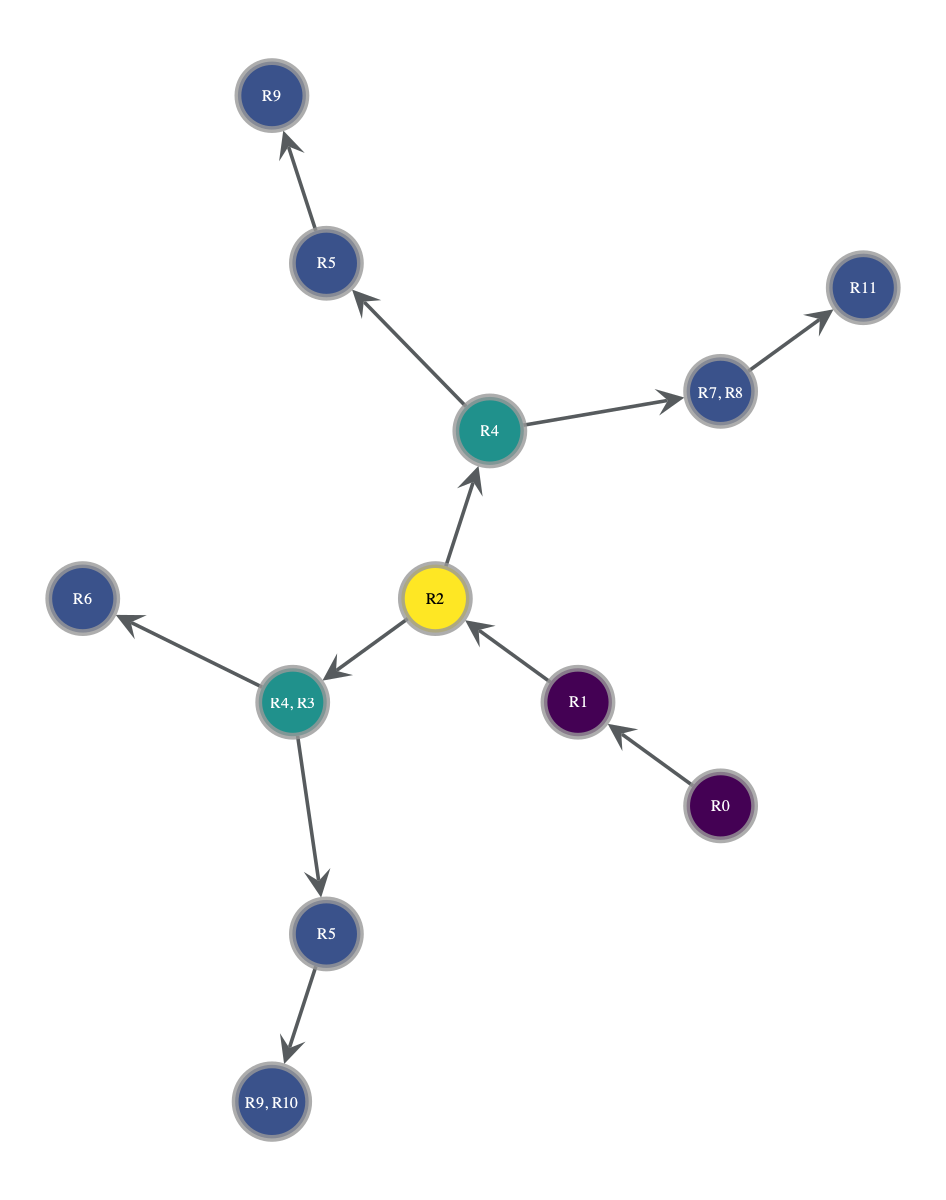

R2
R3
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R3
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R3
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding

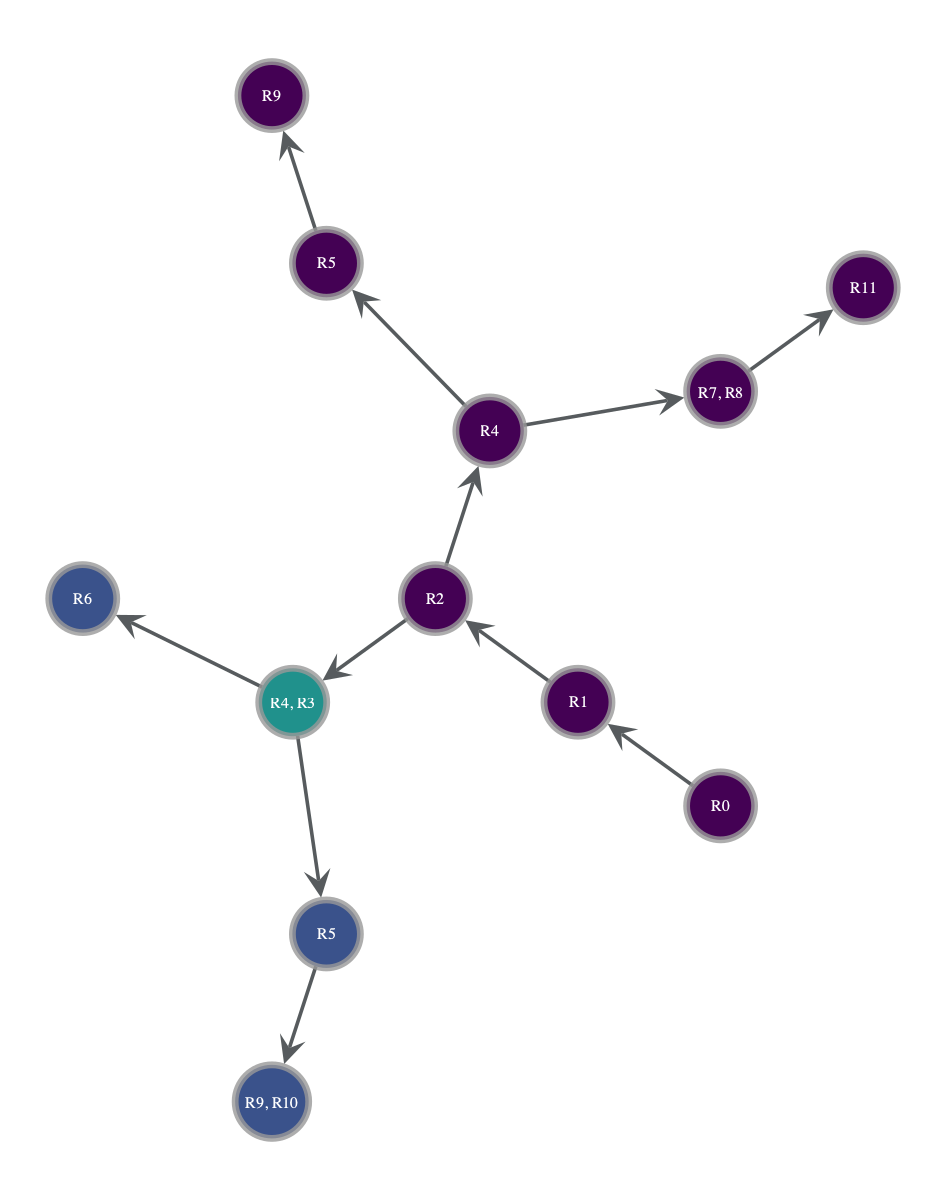

R2
R4
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R4
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R4
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:Fals

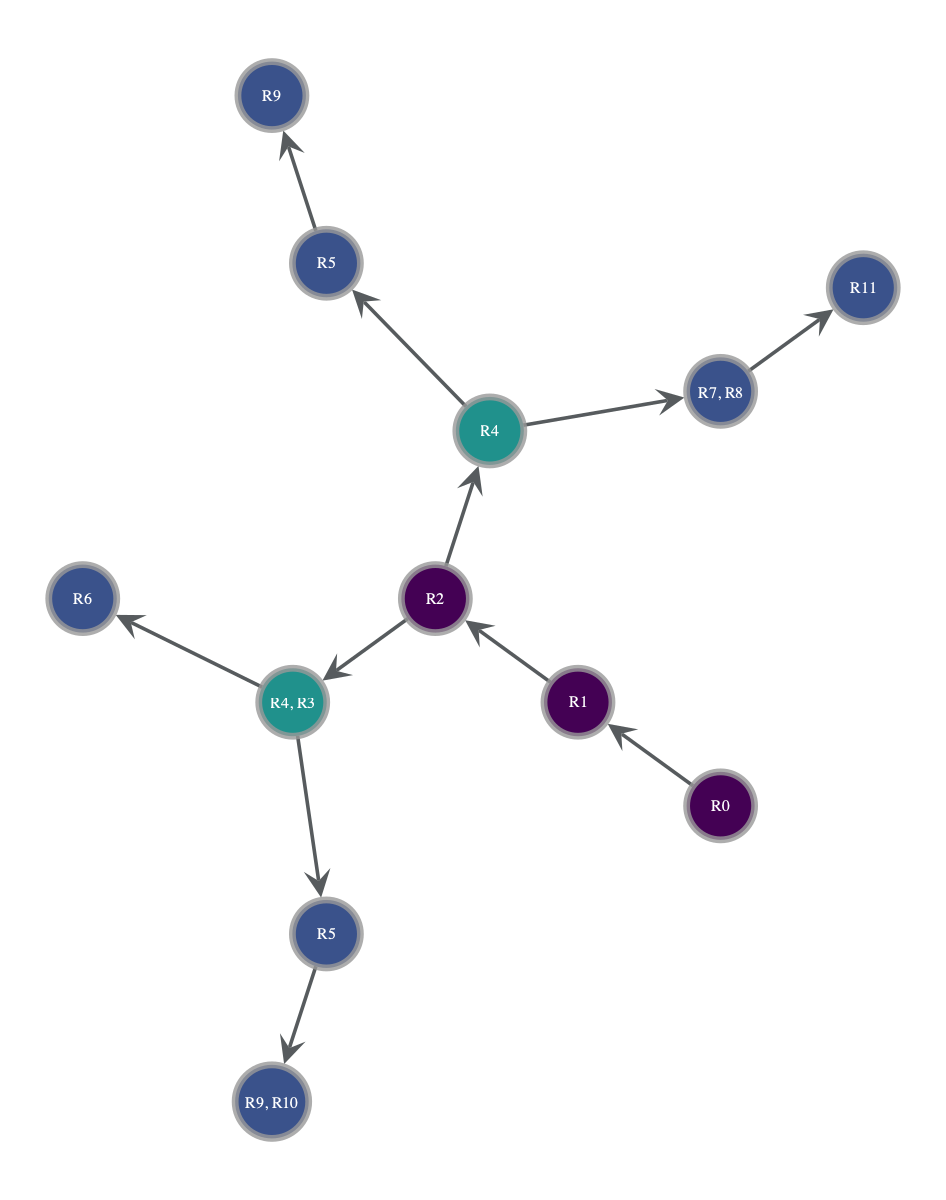

R2
R5
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R5
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R5
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not u

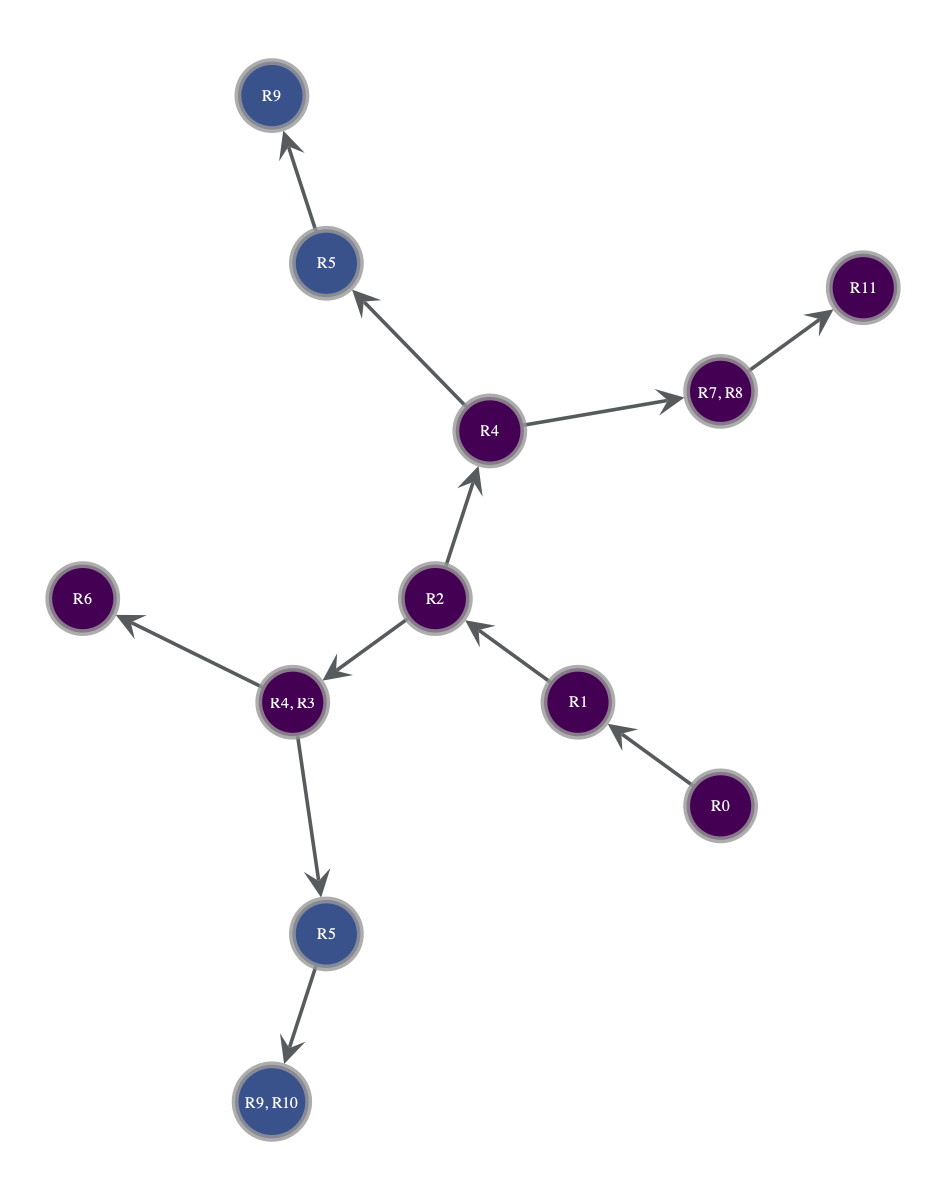

R2
R9
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R9
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R9
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node

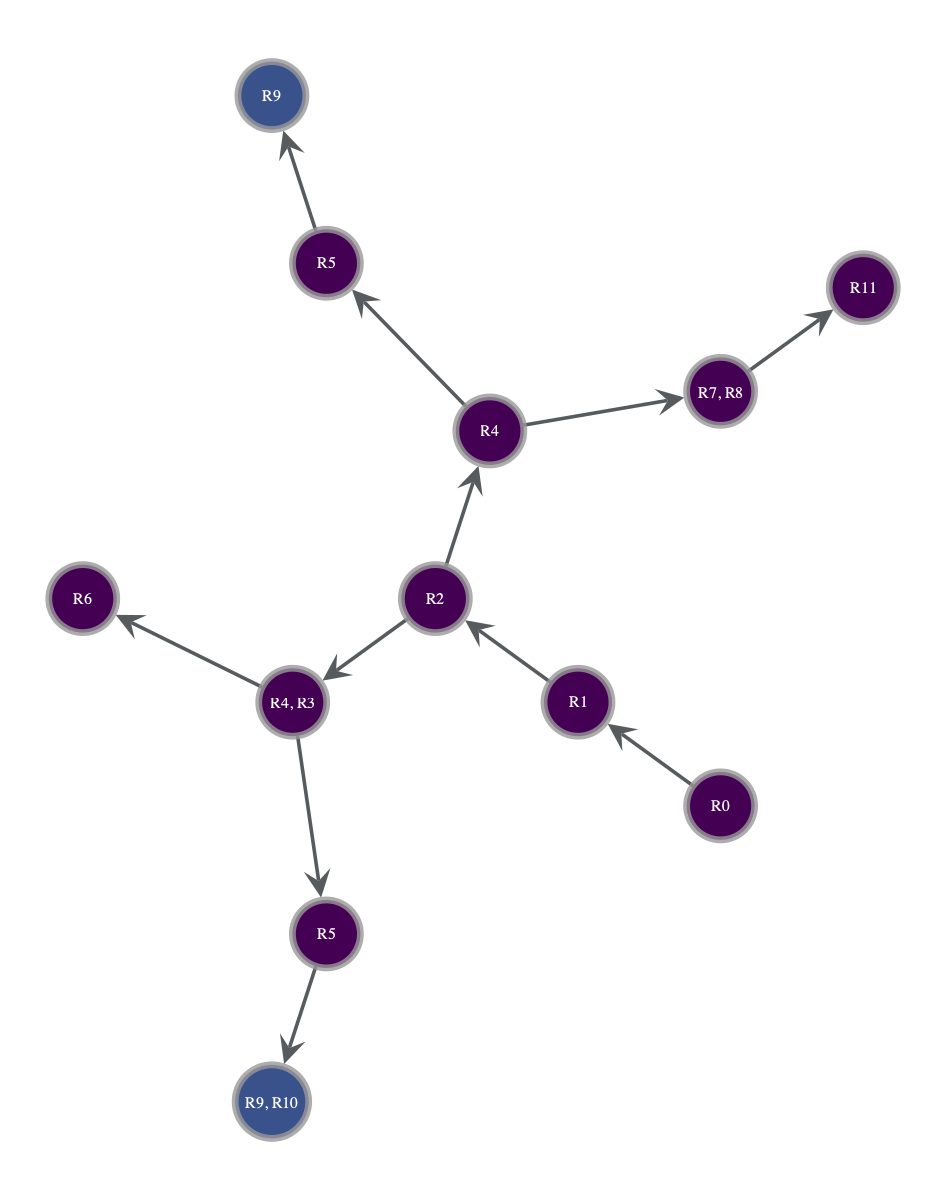

R2
R10
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R10
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R10
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
No

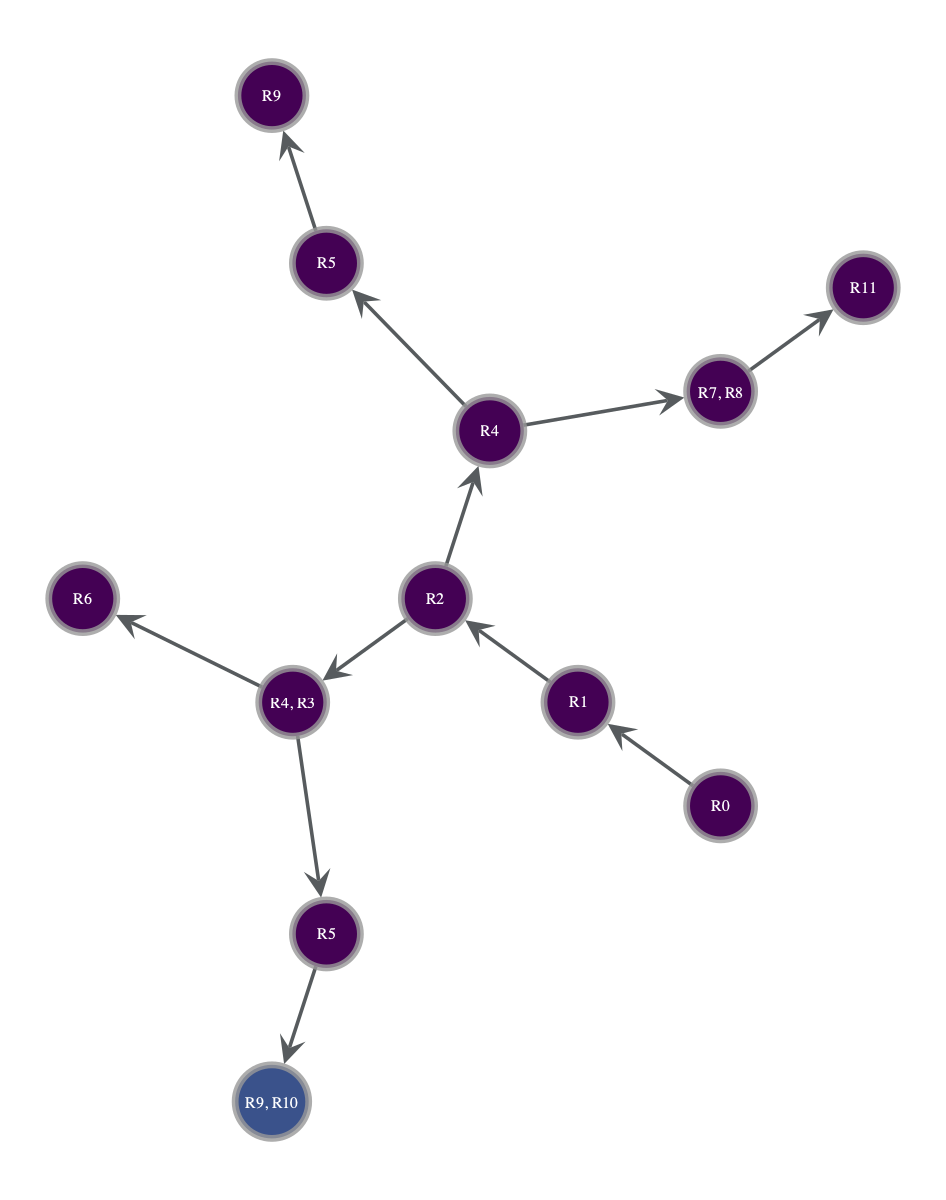

R2
R6
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R6
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R6
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node

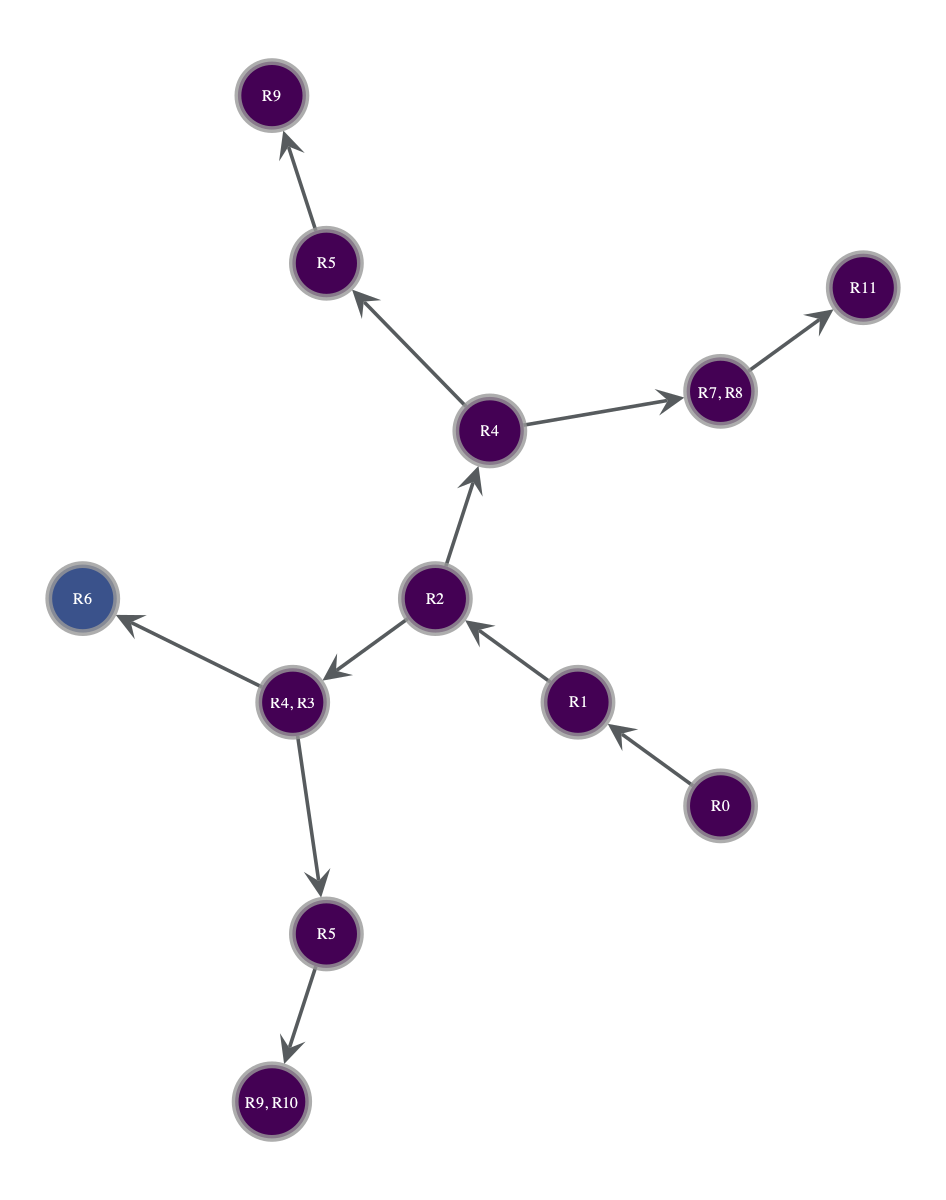

R2
R7
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R7
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R7
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

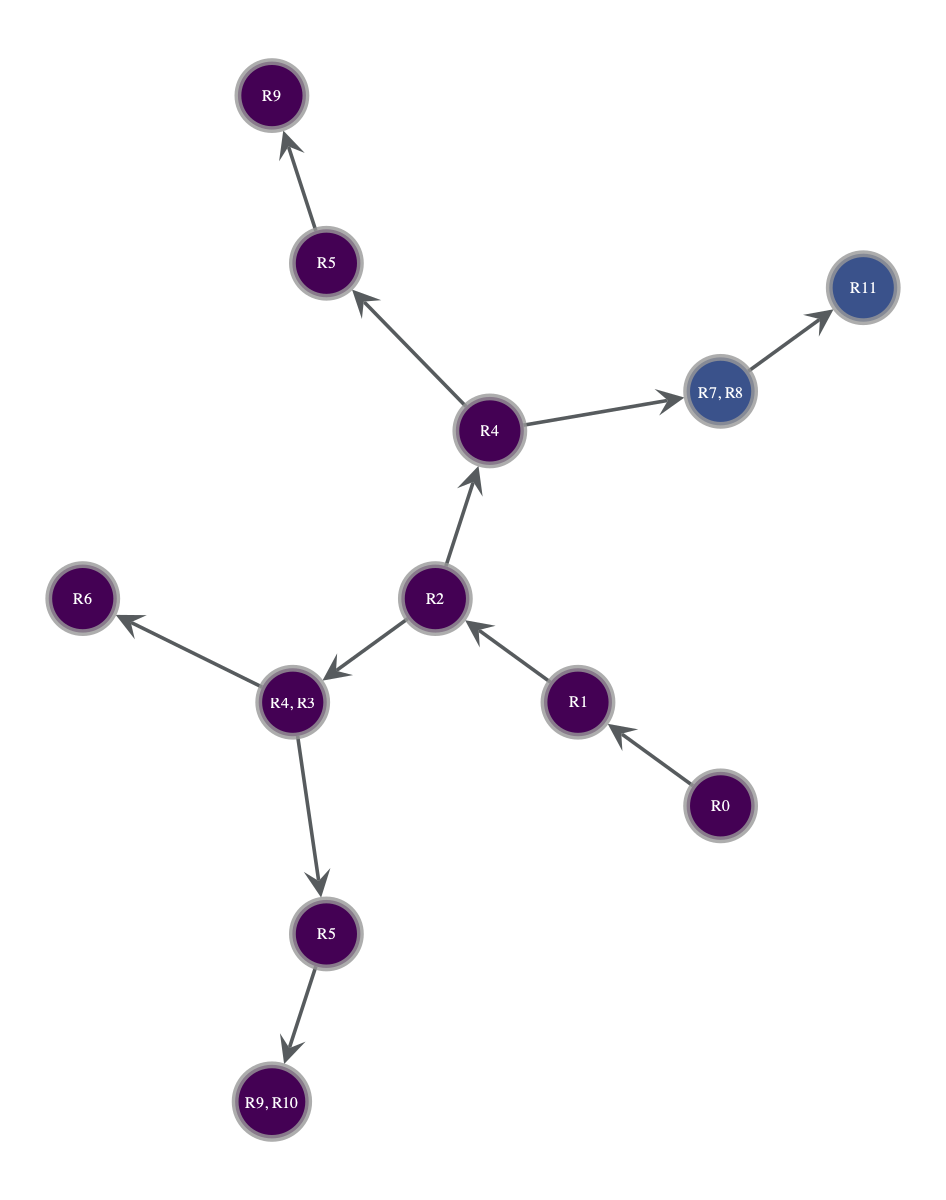

R2
R8
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R8
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R8
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

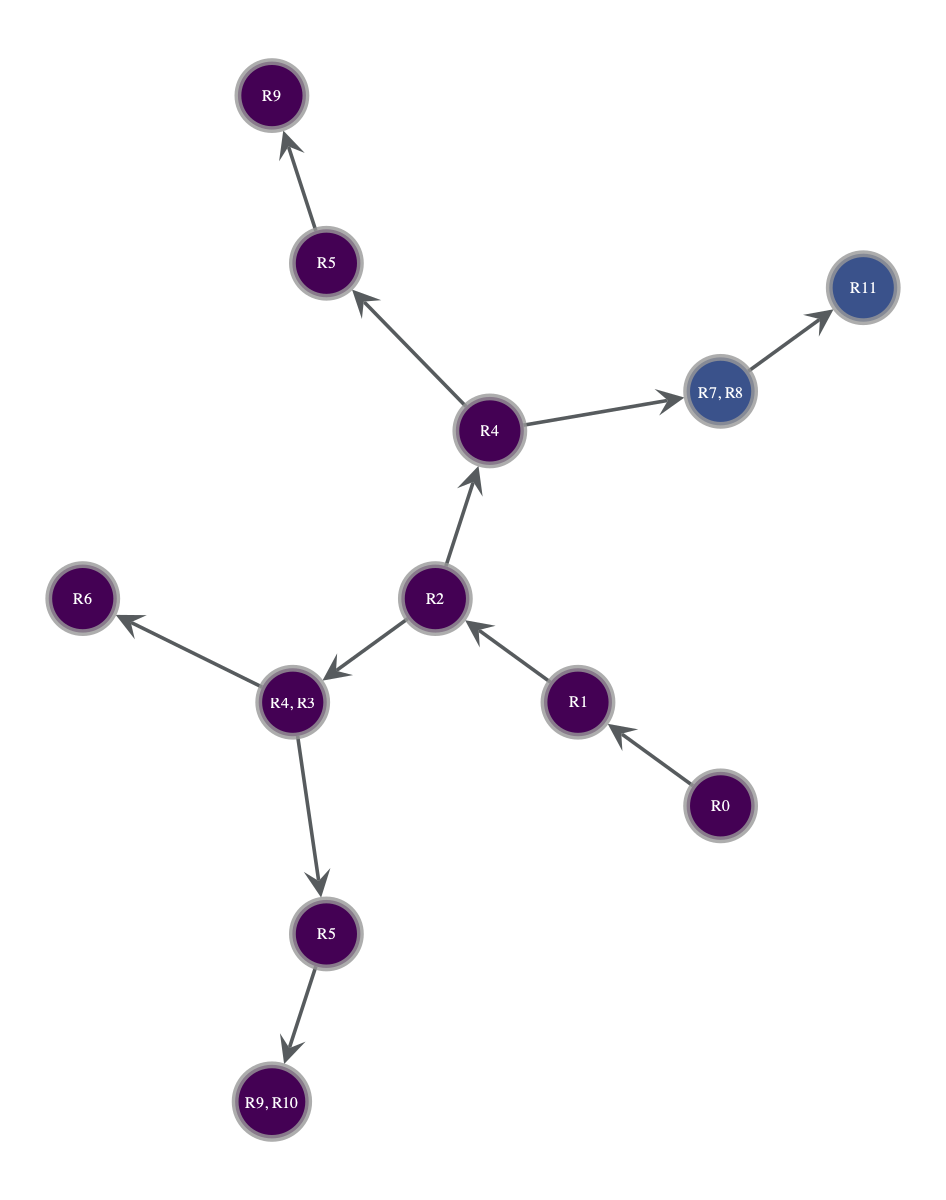

R2
R11
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R11
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R11
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for

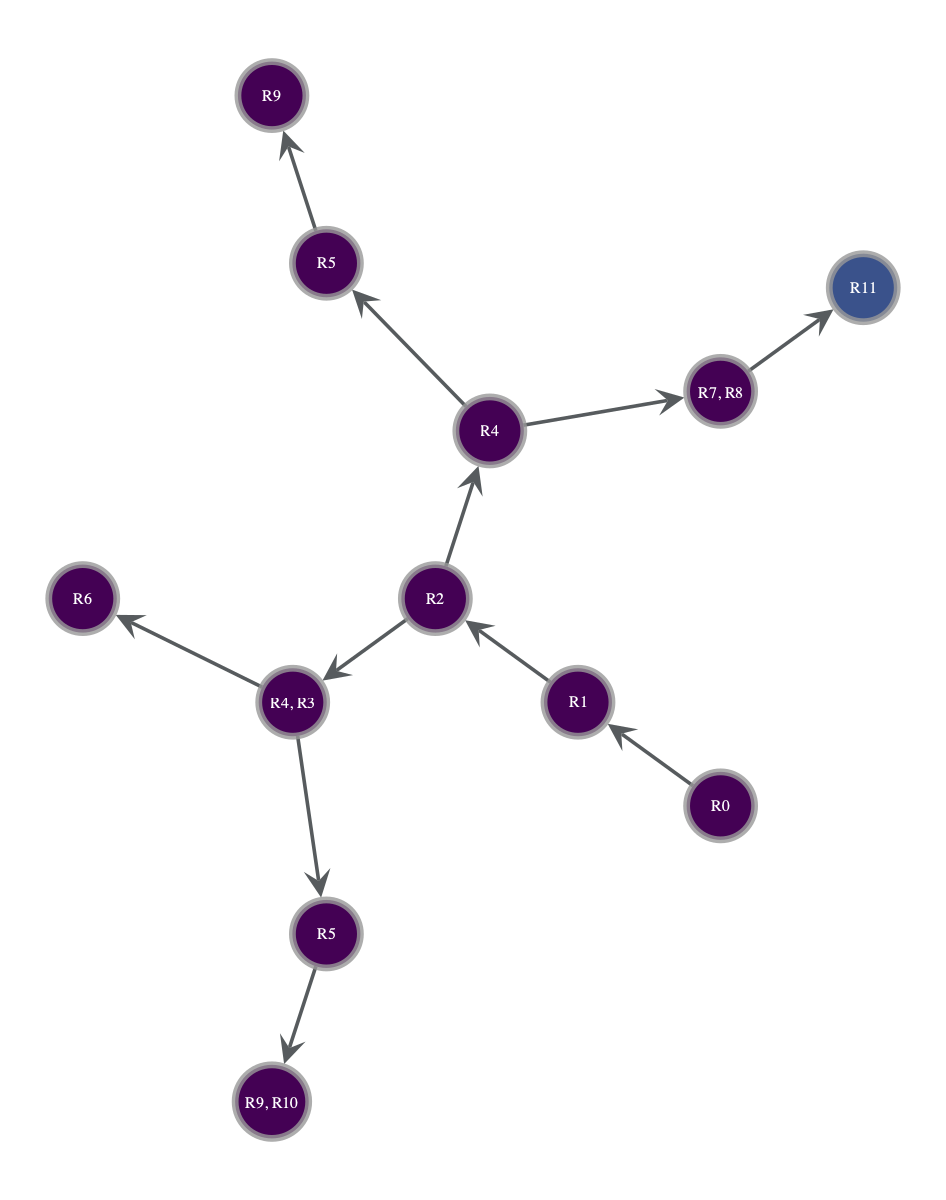

R2
R1
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R1
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R1
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

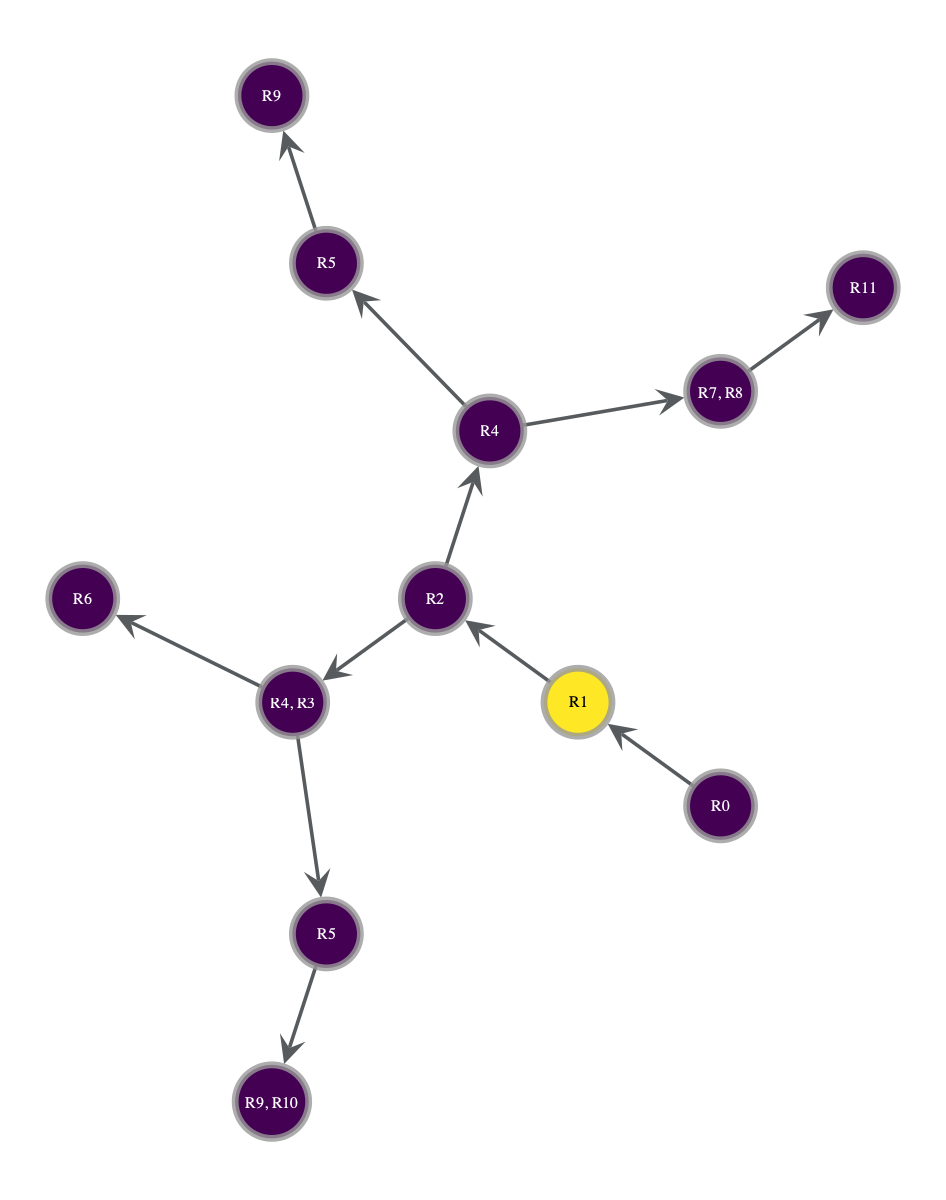

R2
R0
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R0
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R0
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

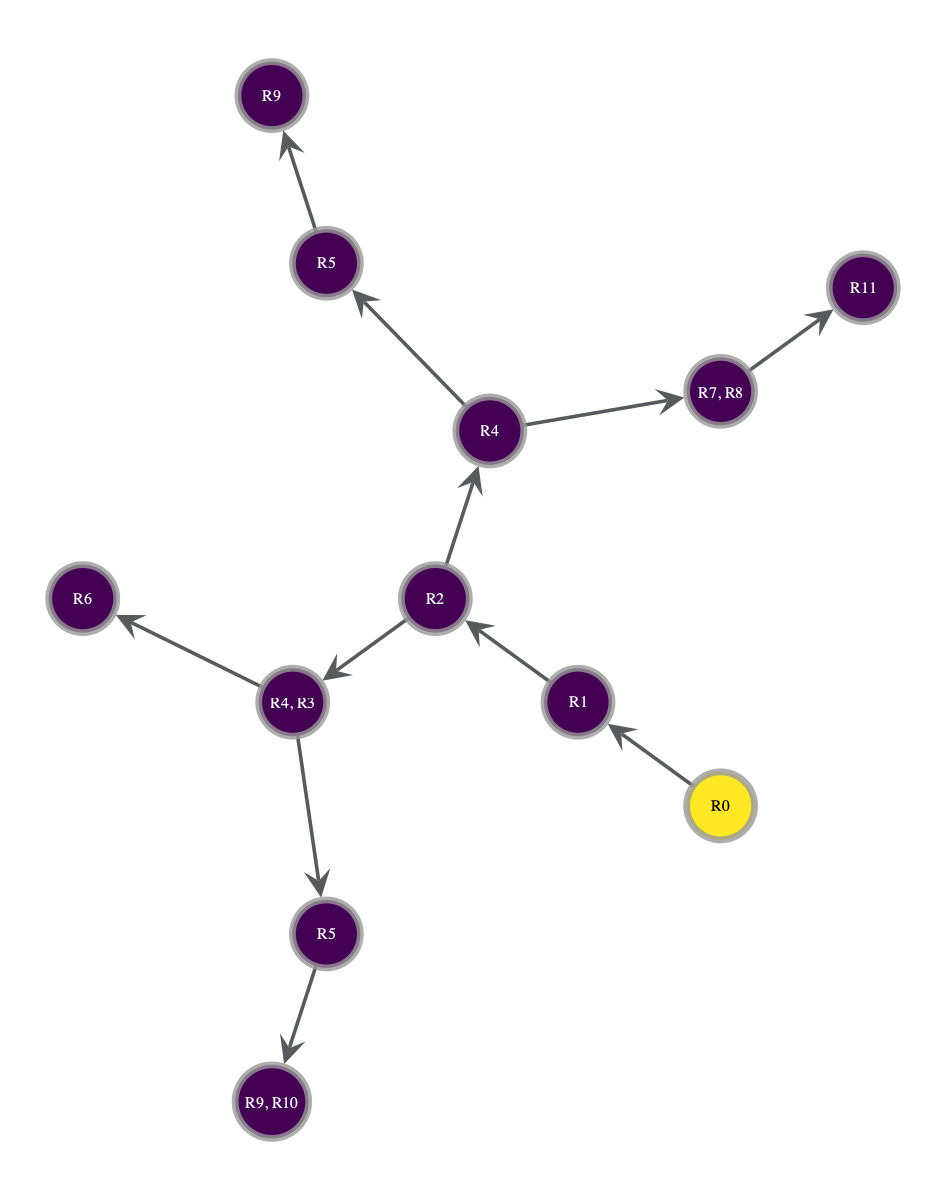

In [1909]:
# Example usage, assuming 'g', 'measured_node', and 'accumulated_categories' are already defined
test_plot = draw_category_propagation_subplots(
    g=g,
    measured_node=nodes[2],
    accumulated_categories=accumulated_categories,  # Pass the data here
    layout='radial',
    categories=None,  # Specify which categories to visualize, or None to include all
    output=None,  # Show inline
    edge_marker_size=14,
    vertex_text=create_node_labels(g, reactions)
)

In [1910]:
test_plot

[<VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d2af800>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d5de690>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d2ac9e0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d172ba0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d25ef90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17cfe70b0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d4d7c80>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d2ade80>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x30965b8c0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x30

In [1911]:
import numpy as np
import matplotlib.pyplot as plt


# Extract the data from each VertexPropertyMap
vertex_data = []
for prop_map in test_plot:
    prop_values = [prop_map[v] for v in g.vertices()]  # Extract values for each vertex
    vertex_data.append(np.array(prop_values))          # Convert to numpy array for easier handling

# Now vertex_data is a list of numpy arrays, each containing the property data for each vertex

In [1912]:
vertex_data[0][0]

array([1.61803399, 1.1755705 ])

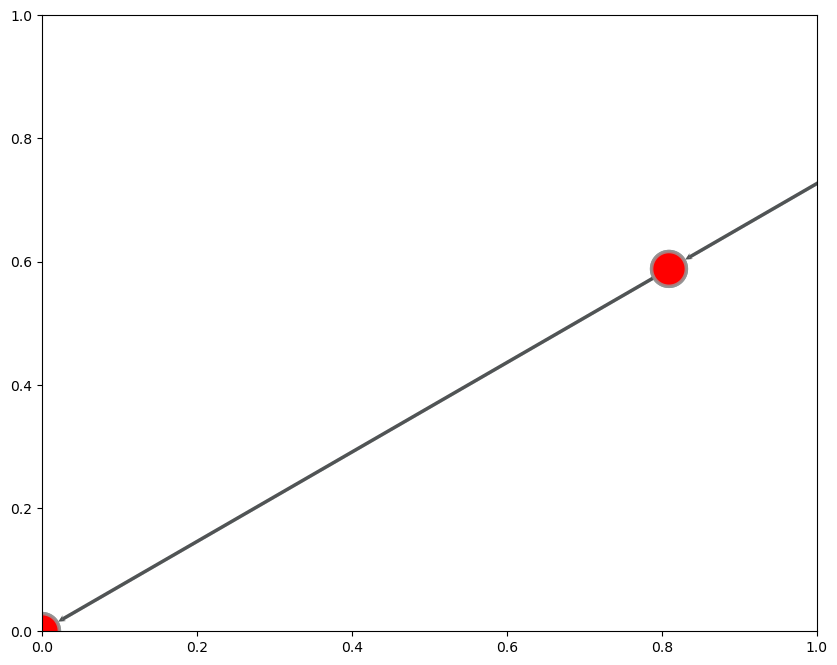

In [1913]:
# Assuming 'g' is your graph and you are assigning vertex colors
vertex_colors = g.new_vertex_property("vector<double>")

# Assign RGBA colors (as tuples) for each vertex
for v in g.vertices():
    vertex_colors[v] = tuple([1.0, 0.0, 0.0, 1.0])  # Ensure this is a tuple, not a list

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10,8))

pos=gt.all.radial_tree_layout(g, nodes[2])

# Draw the graph using the correct format for the vertex colors (as tuples)
graph_draw(g, pos=pos, vertex_fill_color=vertex_colors, mplfig=ax, output_size=(800,600),
           vertex_size=.05, fit_view=True, vertex_font_size=1, edge_marker_size=0.01)

# Show the plot
plt.show()

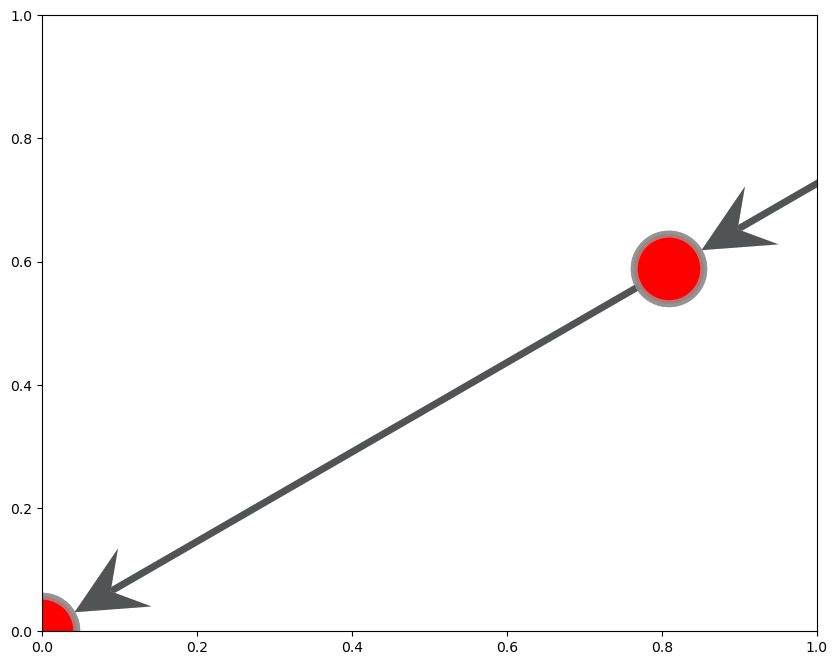

In [1914]:
import matplotlib.pyplot as plt
import graph_tool.all as gt

# Assuming 'g' is your graph and you're assigning vertex colors
vertex_colors = g.new_vertex_property("vector<double>")

# Assign RGBA colors (as tuples) for each vertex
for v in g.vertices():
    vertex_colors[v] = (1.0, 0.0, 0.0, 1.0)  # Red color with full opacity

# Create a matplotlib figure and axis with a reasonable size
fig, ax = plt.subplots(figsize=(10, 8))  # Size in inches

# Compute the radial tree layout; ensure you pass the correct root vertex
root_vertex = g.vertex(2)  # Adjust if 'nodes[2]' is defined differently
pos = gt.radial_tree_layout(g, root_vertex)

# Draw the graph with adjusted parameters
gt.graph_draw(
    g,
    pos=pos,
    vertex_fill_color=vertex_colors,
    mplfig=ax,
    output_size=(800, 600),           # Size in pixels
    vertex_size=.1,                   # Size of vertices
    fit_view=True,                    # Automatically fit the view
    vertex_font_size=.12,              # Font size for vertex labels
    edge_marker_size=.1                 # Size of edge markers
)

# Display the plot
plt.show()

Categories: ['R2', 'R3', 'R4', 'R5', 'R9', 'R10', 'R6', 'R7', 'R8', 'R11', 'R1', 'R0']
R2
R2
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:True
Overall evaluation:True
Adding weight of 1.0
Added weight under node: 2
R3
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R2
Entry 3: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R2
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R2
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight unde

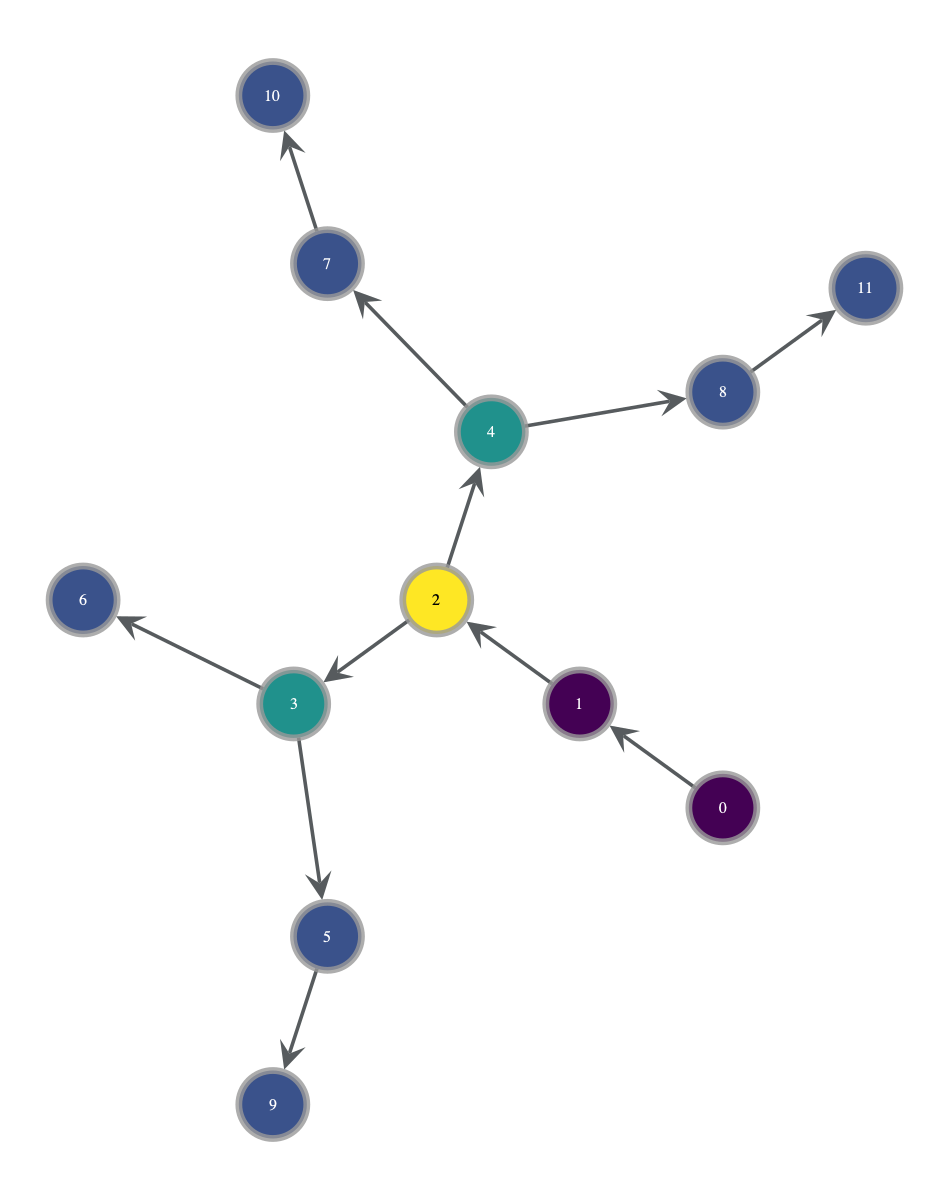

R2
R3
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R4
R3
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R3
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R3
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R3
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding

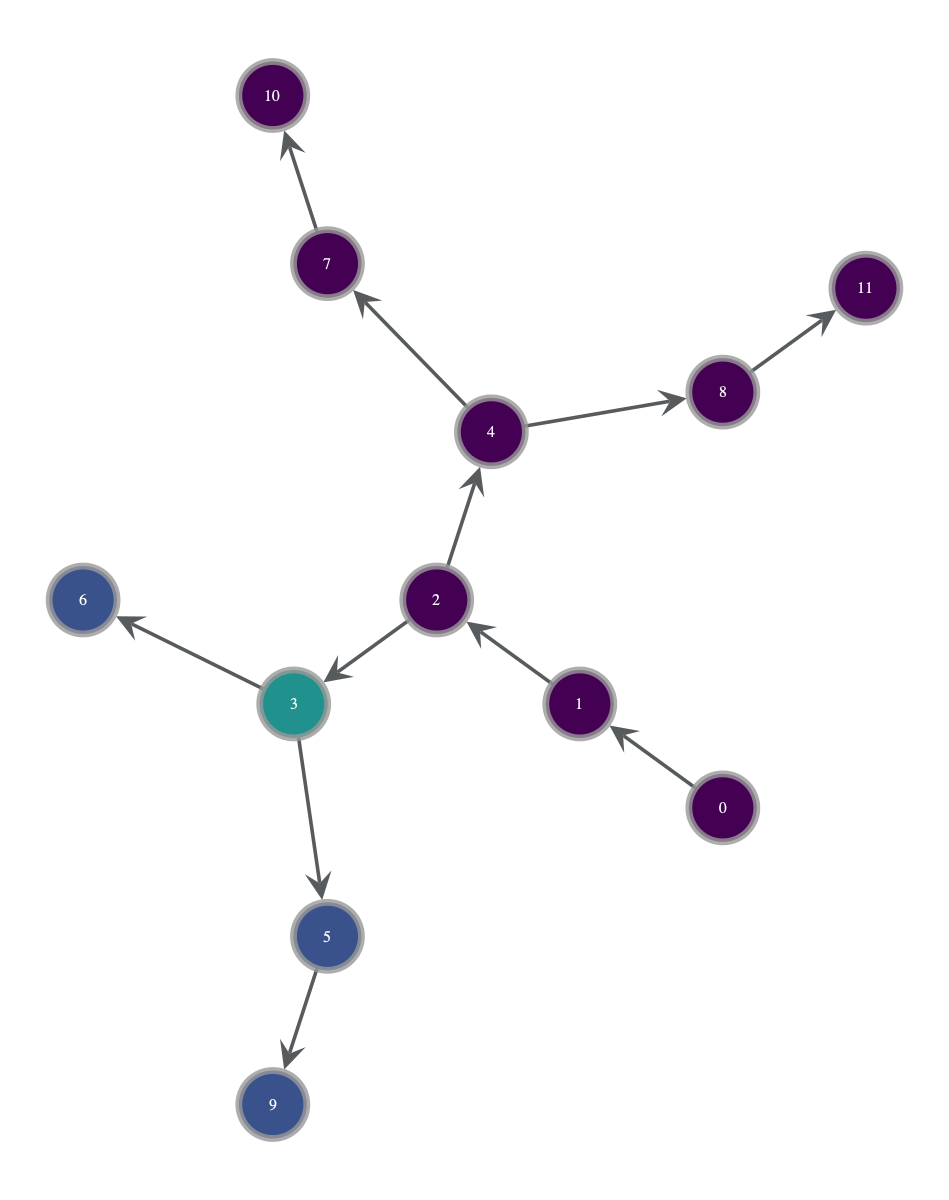

R2
R4
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R4
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.5
Added weight under node: 3
R5
R4
Entry 5: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R4
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R4
Entry 6: has_inherited_cat:True, is_downstream:True, has_current_cat:Fals

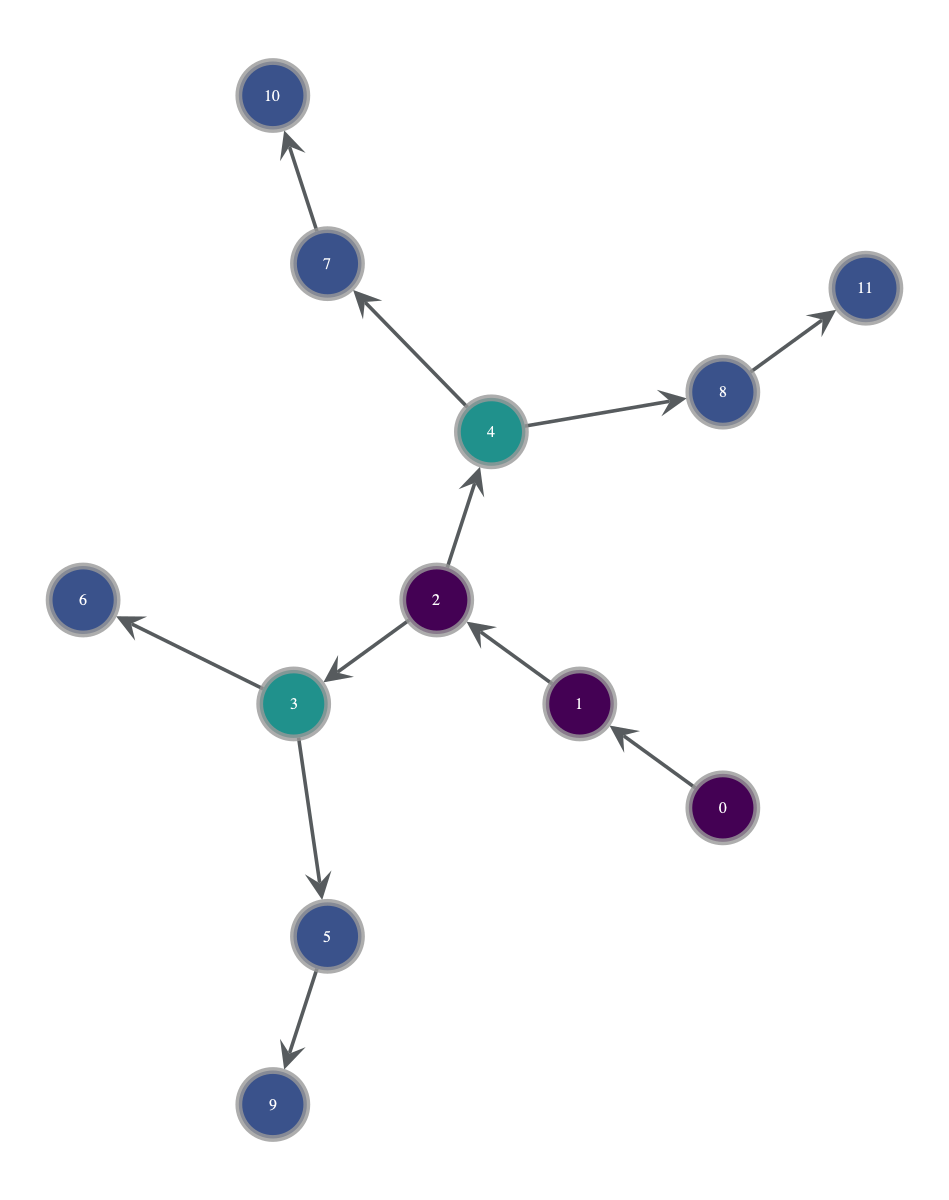

R2
R5
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R5
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R5
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 5
R9
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R5
Entry 9: has_inherited_cat:True, is_downstream:True, has_current_cat:False
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R5
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not u

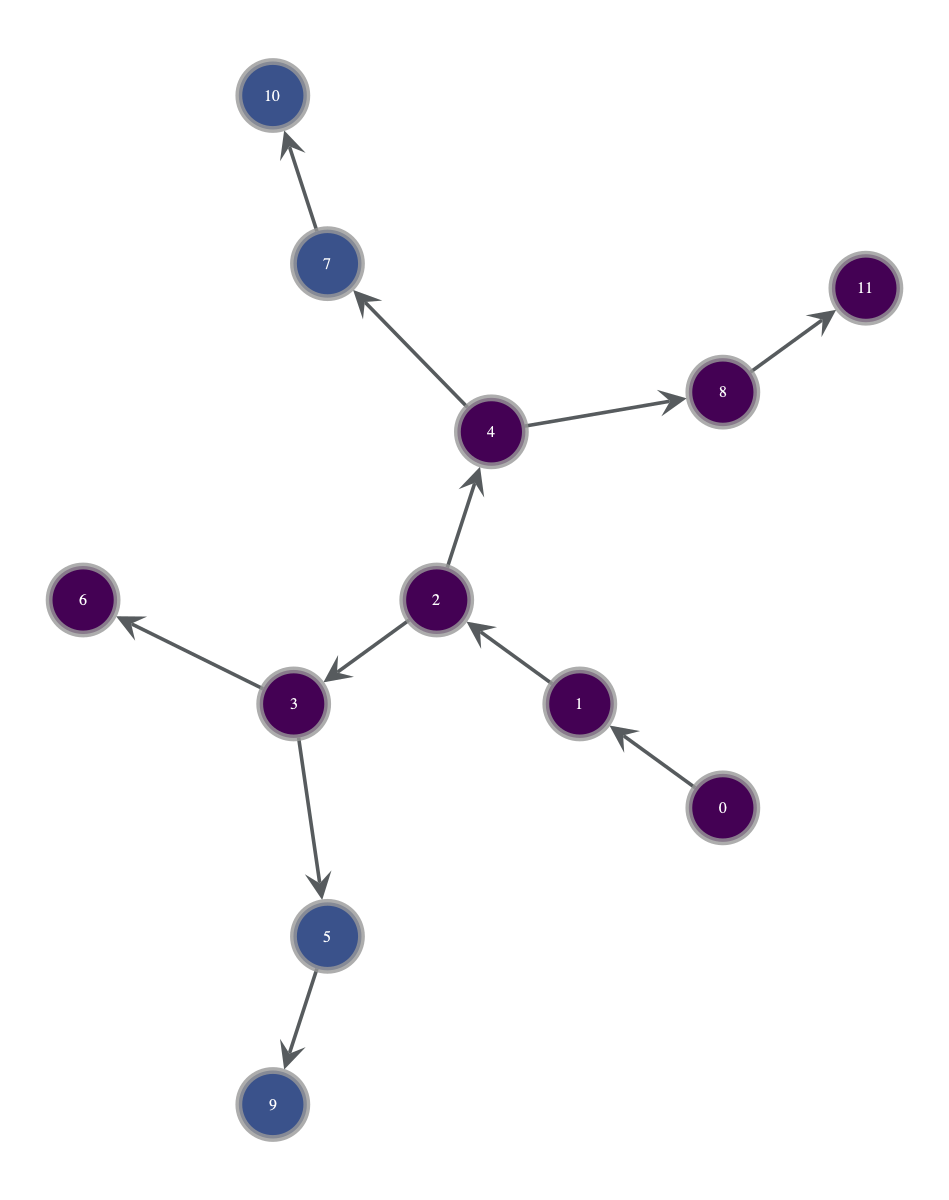

R2
R9
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R9
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R9
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R10
R9
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R9
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node

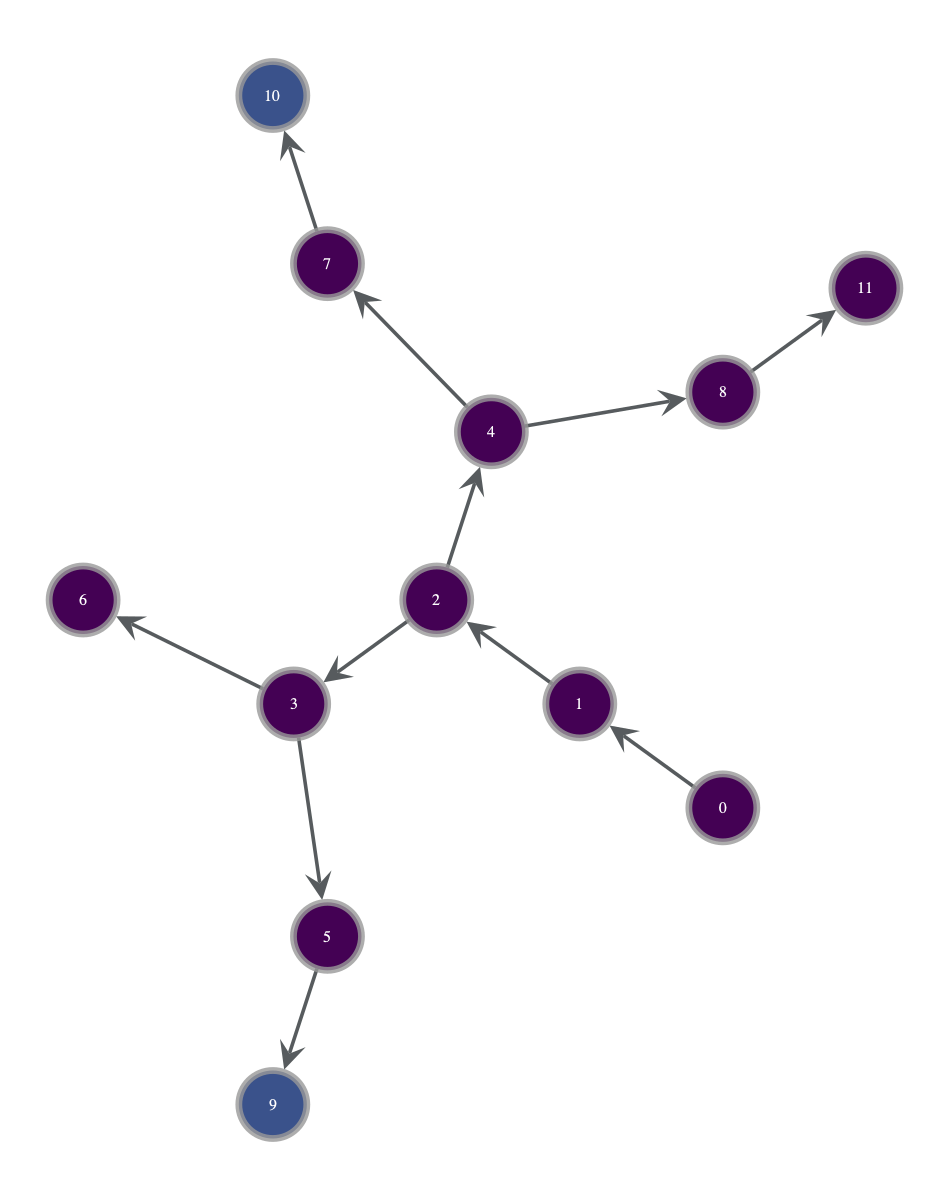

R2
R10
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R10
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R10
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R10
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node: 9
R6
R10
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
No

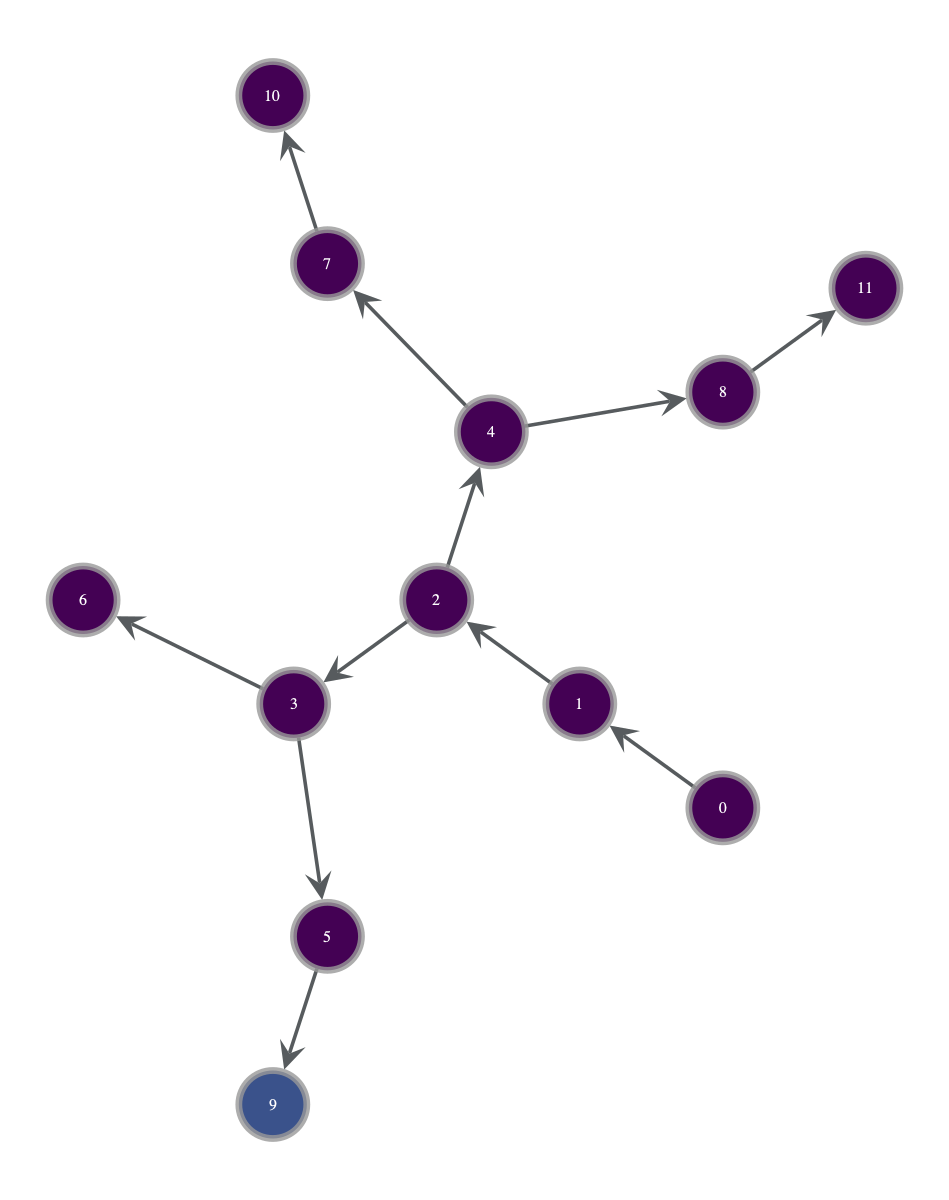

R2
R6
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R6
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R6
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R6
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R6
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:True
Overall evaluation:True
Adding weight of 0.25
Added weight under node

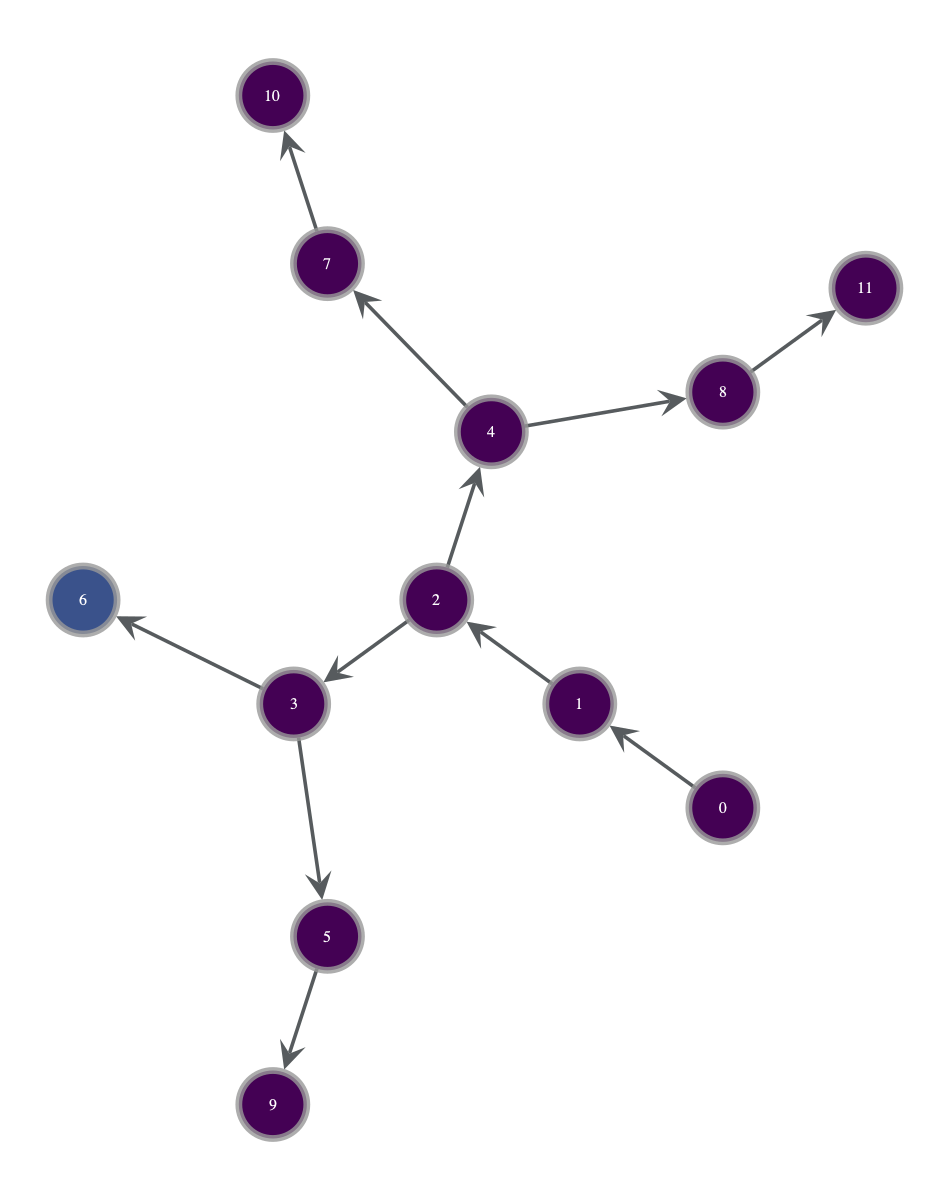

R2
R7
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R7
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R7
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R7
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R7
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

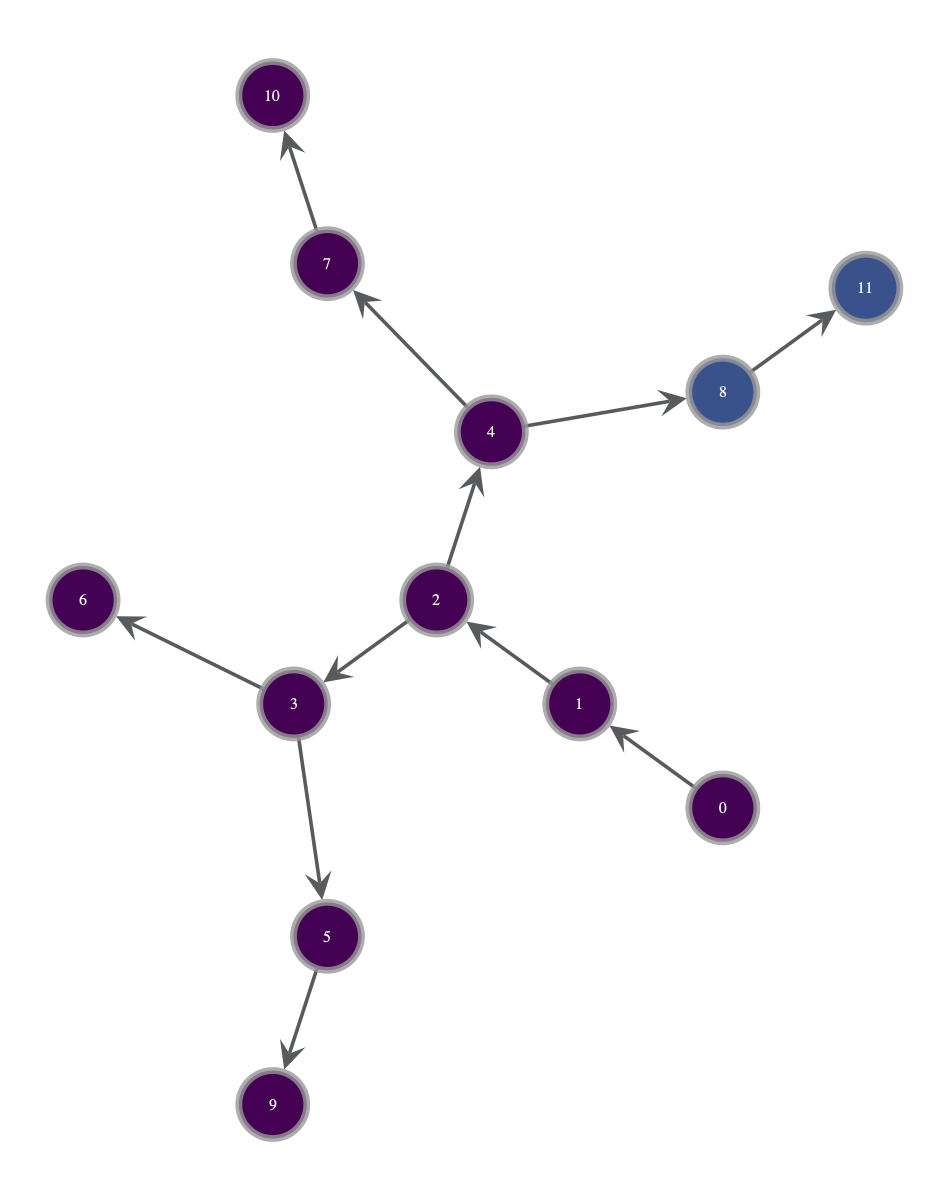

R2
R8
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R8
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R8
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R8
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R8
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

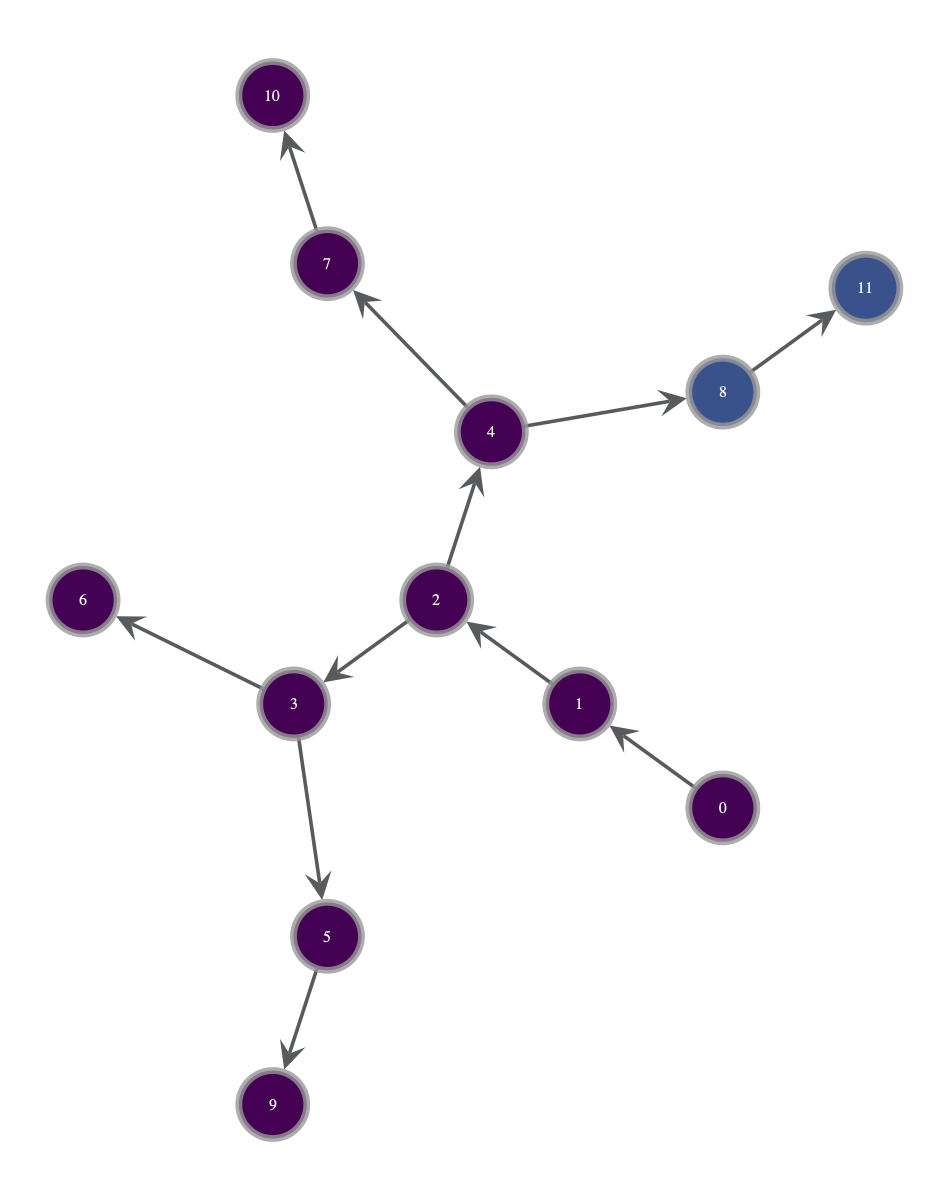

R2
R11
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R11
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R11
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R11
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R11
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for

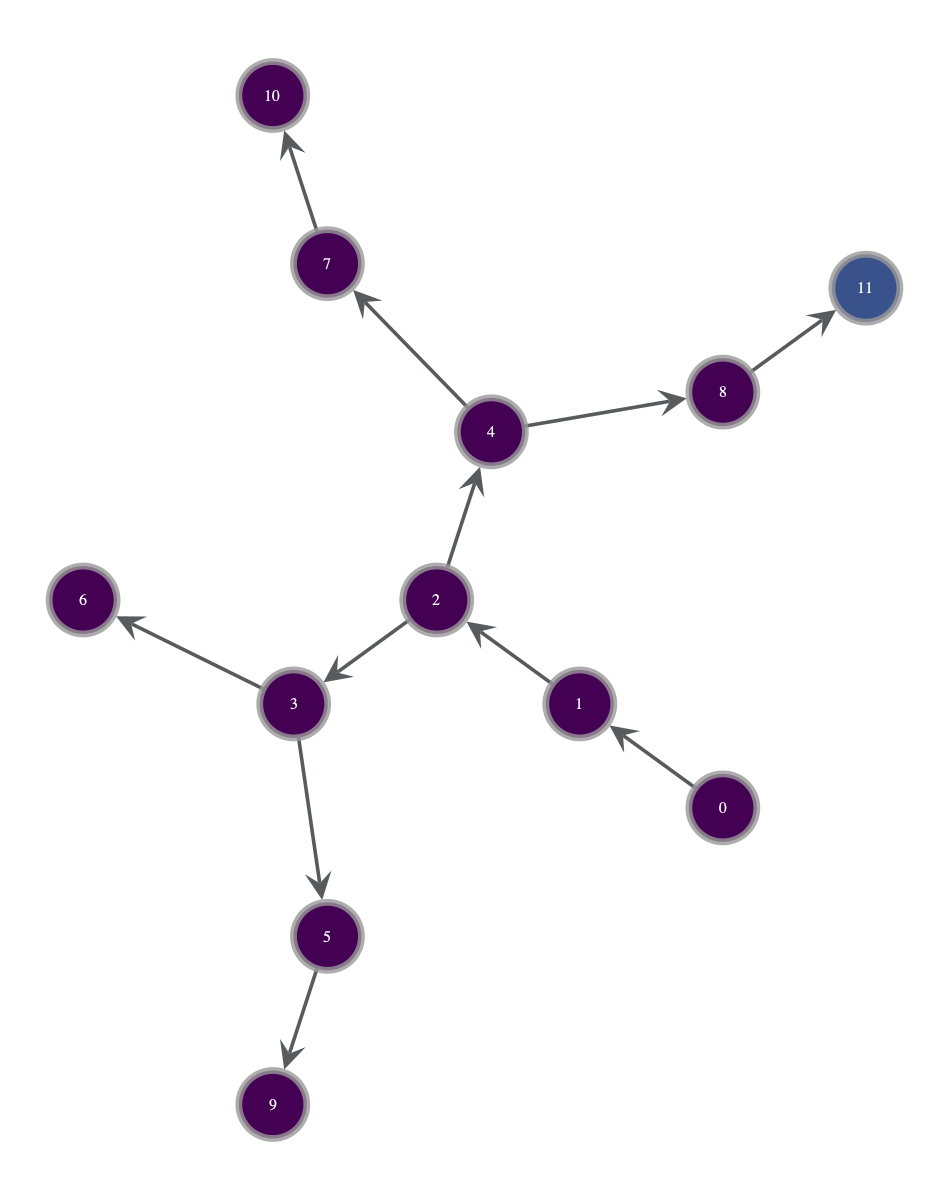

R2
R1
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R1
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R1
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R1
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R1
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

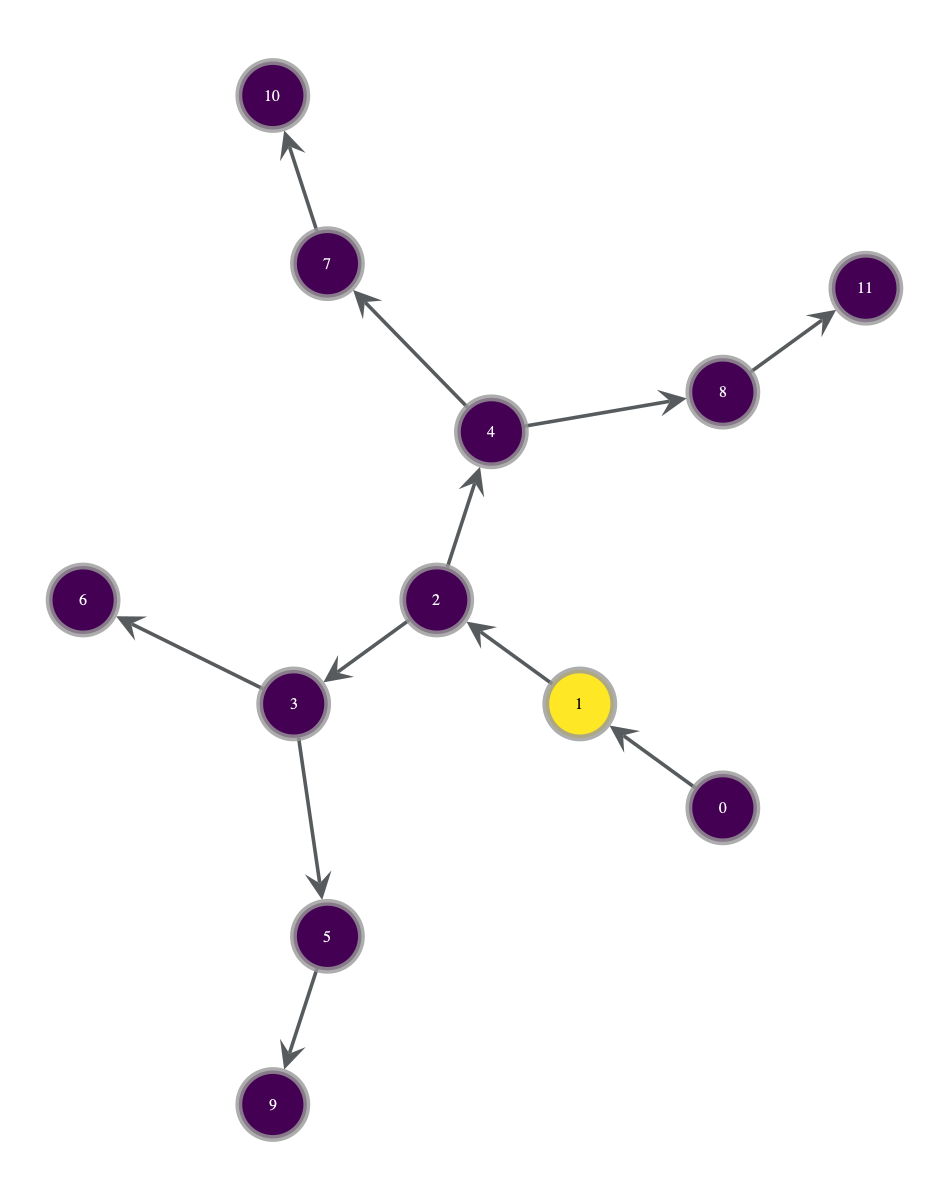

R2
R0
Entry 2: has_inherited_cat:False, is_downstream:False, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 2
R3
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 3
R4
R0
Entry 3: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R5
R0
Entry 5: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 5
R9
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 9
R10
R0
Entry 9: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
R6
R0
Entry 6: has_inherited_cat:False, is_downstream:True, has_current_cat:False
Overall evaluation:False
Not upstream
Setting weigth to 0 for node: 

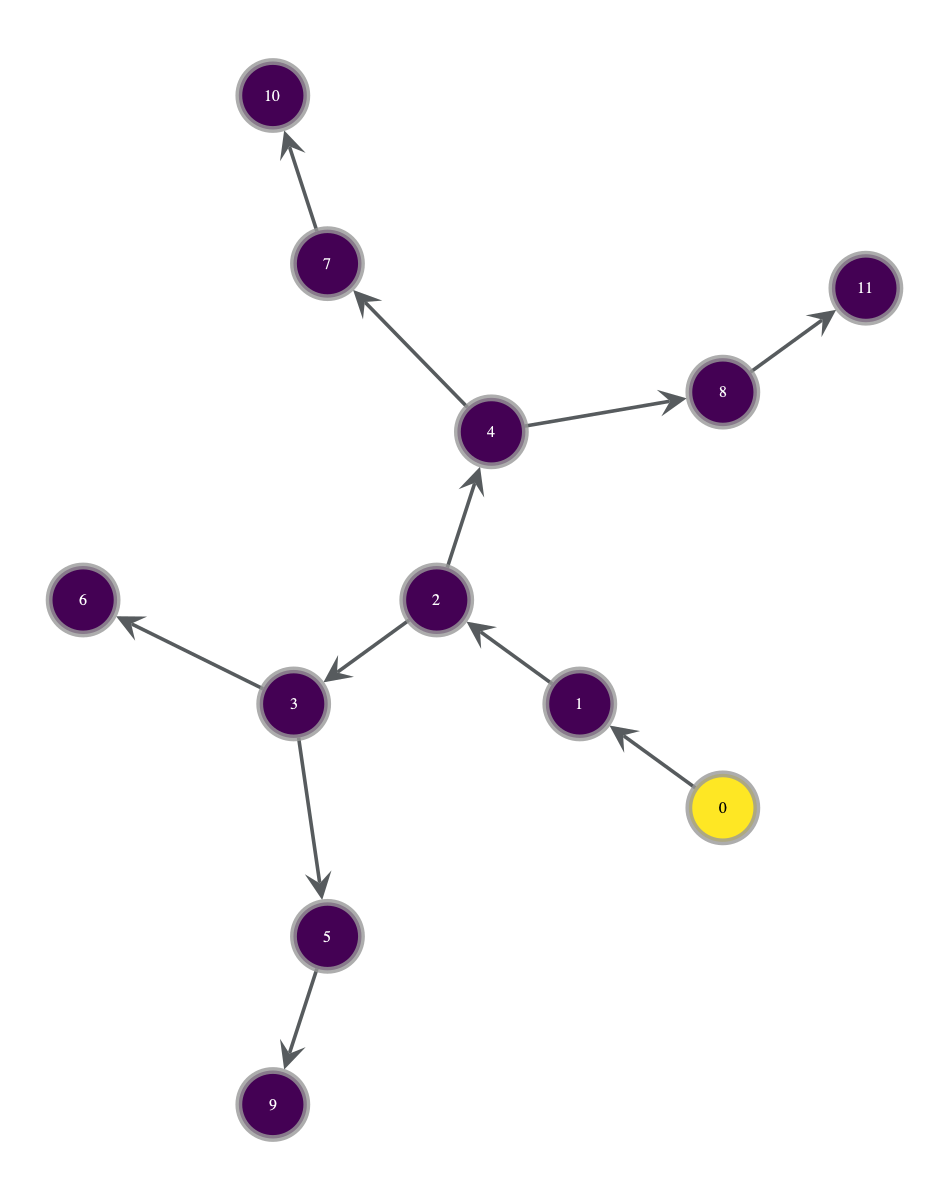

[<VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17ce7a060>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x30a18faa0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x309968500>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x309722600>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d1723c0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x30999a570>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x30a1baa20>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x3096c3830>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x17d170920>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x30965a300, at 0x30

In [1915]:
# Example usage, assuming 'g', 'measured_node', and 'accumulated_categories' are already defined
draw_category_propagation_subplots(
    g=g,
    measured_node=nodes[2],
    accumulated_categories=accumulated_categories,  # Pass the data here
    layout='radial',
    categories=None,  # Specify which categories to visualize, or None to include all
    output=None,  # Show inline
    vertex_text=g.vertex_index,
    edge_marker_size=14,
)